## Calculate Core Results Values

#### FOR each YEAR and SEASON

* Overall surface water area (SWA)
    * area and percent
    * difference in area and percent areas

* Difference in percent (SWA) between PlanetBasemap and DSWE by HUC-12

* Number of pixels -- need to do some more raster stuff
    * that both classify water
    * PlanetBasemaps only classify water
    * DSWE only classify water

In [ ]:
import pandas as pd
from glob import glob
import os

BASEPATH = 'D:/Research'

In [2]:
dswe_basepath = 'D:/Research/data/huc_stats_p3/DSWE'
plBm_basepath = 'D:/Research/data/huc_stats_p3/PlanetBasemaps'
gsw_basepath = 'D:/Research/data/huc_stats_p3/GSW'
dswe50_basepath = 'D:/Research/data/huc_stats_p3/DSWE50'

#### 2017 - Spring

In [3]:
YEAR = 2017
SZN = 'SPRING'
CONF = 'conf1'

dswe_df = pd.read_csv(f'{dswe_basepath}/{YEAR}_{SZN}_DSWE_{CONF}.csv')
plBm_df = pd.read_csv(f'{plBm_basepath}/{YEAR}_{SZN}_PlanetBasemaps.csv')
gsw_df = pd.read_csv(f'{gsw_basepath}/{YEAR}_{SZN}_GSW.csv')
dswe50_df = pd.read_csv(f'{dswe50_basepath}/{YEAR}_{SZN}_DSWE50_{CONF}.csv')


dswe_df['pSW'] = dswe_df['total_water'] / dswe_df['total_pixels'] 
plBm_df['pSW'] = plBm_df['total_water'] / plBm_df['total_pixels']
gsw_df['pSW'] = gsw_df['total_water'] / gsw_df['total_pixels']
dswe50_df['pSW'] = dswe50_df['total_water'] / dswe50_df['total_pixels'] 


dswe_df['SWA_sqkm'] = dswe_df['total_water'] * dswe_df['res_x'] * dswe_df['res_y'] / 1E6
plBm_df['SWA_sqkm'] = plBm_df['total_water'] * plBm_df['res_x'] * plBm_df['res_y'] / 1E6
gsw_df['SWA_sqkm'] = gsw_df['total_water'] * gsw_df['res_x'] * gsw_df['res_y'] / 1E6
dswe50_df['SWA_sqkm'] = dswe50_df['total_water'] * dswe50_df['res_x'] * dswe50_df['res_y'] / 1E6


In [4]:
dswe_df

,huc12,total_water,total_pixels,res_x,res_y,pSW,SWA_sqkm
0,31300010101,0.0,2538977,4.77,4.77,0.000000,0.000000
1,31300010104,7301.0,3840840,4.77,4.77,0.001901,0.166119
2,31300010102,5175.0,3107042,4.77,4.77,0.001666,0.117746
3,31300010103,211.0,2555122,4.77,4.77,0.000083,0.004801
4,31300010105,7021.0,2254100,4.77,4.77,0.003115,0.159748
...,...,...,...,...,...,...,...
57,31300011202,2749.0,3406259,4.77,4.77,0.000807,0.062548
58,31300011203,23724.0,4275925,4.77,4.77,0.005548,0.539790
59,31300011201,8550.0,4444224,4.77,4.77,0.001924,0.194537
60,31300011106,11260.0,960933,4.77,4.77,0.011718,0.256198


In [5]:
dswe50_df

,huc12,total_water,total_pixels,res_x,res_y,pSW,SWA_sqkm
0,31300010101,0.0,2538977,4.77,4.77,0.000000,0.000000
1,31300010104,5174.0,3840840,4.77,4.77,0.001347,0.117724
2,31300010102,4700.0,3107042,4.77,4.77,0.001513,0.106939
3,31300010103,84.0,2555122,4.77,4.77,0.000033,0.001911
4,31300010105,4351.0,2254100,4.77,4.77,0.001930,0.098998
...,...,...,...,...,...,...,...
57,31300011202,1883.0,3406259,4.77,4.77,0.000553,0.042844
58,31300011203,18250.0,4275925,4.77,4.77,0.004268,0.415240
59,31300011201,5743.0,4444224,4.77,4.77,0.001292,0.130670
60,31300011106,8529.0,960933,4.77,4.77,0.008876,0.194059


In [6]:
plBm_df

,huc12,total_water,total_pixels,res_x,res_y,pSW,SWA_sqkm
0,31300010101,0.0,2541451,4.77,4.77,0.000000,0.000000
1,31300010104,10441.0,3840840,4.77,4.77,0.002718,0.237563
2,31300010102,7276.0,3108185,4.77,4.77,0.002341,0.165550
3,31300010103,435.0,2555638,4.77,4.77,0.000170,0.009898
4,31300010105,9459.0,2254100,4.77,4.77,0.004196,0.215220
...,...,...,...,...,...,...,...
57,31300011202,22742.0,3410216,4.77,4.77,0.006669,0.517446
58,31300011203,58850.0,4275925,4.77,4.77,0.013763,1.339008
59,31300011201,56000.0,4446035,4.77,4.77,0.012595,1.274162
60,31300011106,30607.0,962296,4.77,4.77,0.031806,0.696398


In [7]:
gsw_df

,huc12,total_water,total_pixels,res_x,res_y,pSW,SWA_sqkm
0,31300010101,0.0,2539378,4.77,4.77,0.000000,0.000000
1,31300010104,10305.0,3840840,4.77,4.77,0.002683,0.234469
2,31300010102,6364.0,3107148,4.77,4.77,0.002048,0.144799
3,31300010103,356.0,2555176,4.77,4.77,0.000139,0.008100
4,31300010105,9380.0,2254100,4.77,4.77,0.004161,0.213422
...,...,...,...,...,...,...,...
57,31300011202,3274.0,3406553,4.77,4.77,0.000961,0.074493
58,31300011203,23925.0,4275925,4.77,4.77,0.005595,0.544363
59,31300011201,8691.0,4444664,4.77,4.77,0.001955,0.197745
60,31300011106,15898.0,960972,4.77,4.77,0.016544,0.361726


In [8]:
plBm_studyArea_dict = dict(plBm_df[['total_water', 'total_pixels', 'SWA_sqkm']].sum())
plBm_studyArea_dict

{'total_water': np.float64(7539739.0),
 'total_pixels': np.float64(180496937.0),
 'SWA_sqkm': np.float64(171.5509274931)}

In [9]:
dswe_studyArea_dict = dict(dswe_df[['total_water', 'total_pixels', 'SWA_sqkm']].sum())
dswe_studyArea_dict

{'total_water': np.float64(5735467.0),
 'total_pixels': np.float64(180421263.0),
 'SWA_sqkm': np.float64(130.49850710430005)}

In [10]:
dswe50_studyArea_dict = dict(dswe50_df[['total_water', 'total_pixels', 'SWA_sqkm']].sum())
dswe50_studyArea_dict

{'total_water': np.float64(5543674.0),
 'total_pixels': np.float64(180421263.0),
 'SWA_sqkm': np.float64(126.13466015460003)}

In [11]:
gsw_studyArea_dict = dict(gsw_df[['total_water', 'total_pixels', 'SWA_sqkm']].sum())
gsw_studyArea_dict

{'total_water': np.float64(6481926.0),
 'total_pixels': np.float64(180427950.0),
 'SWA_sqkm': np.float64(147.48261408540006)}

## Overall surface water area (SWA)

#### Full Study Area Percent and Area

In [12]:
plBm_studyArea = plBm_studyArea_dict['total_water'] / plBm_studyArea_dict['total_pixels'] * 100
dswe_studyArea = dswe_studyArea_dict['total_water'] / dswe_studyArea_dict['total_pixels'] * 100
dswe50_studyArea = dswe50_studyArea_dict['total_water'] / dswe50_studyArea_dict['total_pixels'] * 100
gsw_studyArea = gsw_studyArea_dict['total_water'] / gsw_studyArea_dict['total_pixels'] * 100

print(f"PlanetBasemap Study Area Percent Surface Water:   {round(plBm_studyArea, 4)} %")
print(f"DSWE Study Area Percent Surface Water:            {round(dswe_studyArea, 4)} %")
print(f"DSWE 50 Study Area Percent Surface Water:         {round(dswe50_studyArea, 4)} %")
print(f"GSW Study Area Percent Surface Water:             {round(gsw_studyArea, 4)} %")

print()
print(f"PlanetBasemap Study Area Total Surface Water:   {round(plBm_studyArea_dict['SWA_sqkm'], 4)} km2")
print(f"DSWE Study Area Total Surface Water:            {round(dswe_studyArea_dict['SWA_sqkm'], 4)} km2")
print(f"DSWE 50 Study Area Total Surface Water:         {round(dswe50_studyArea_dict['SWA_sqkm'], 4)} km2")
print(f"GSW Study Area Total Surface Water:             {round(gsw_studyArea_dict['SWA_sqkm'], 4)} km2")

PlanetBasemap Study Area Percent Surface Water:   4.1772 %
DSWE Study Area Percent Surface Water:            3.1789 %
DSWE 50 Study Area Percent Surface Water:         3.0726 %
GSW Study Area Percent Surface Water:             3.5925 %

PlanetBasemap Study Area Total Surface Water:   171.5509 km2
DSWE Study Area Total Surface Water:            130.4985 km2
DSWE 50 Study Area Total Surface Water:         126.1347 km2
GSW Study Area Total Surface Water:             147.4826 km2


#### Full Study Area Percent and Area - Differences

In [13]:
planet_dswe_difference_percent = plBm_studyArea - dswe_studyArea
planet_dswe_difference_sqkm = plBm_studyArea_dict['SWA_sqkm'] - dswe_studyArea_dict['SWA_sqkm']

print(f"Planet - DSWE Study Area Percent Surface Water:  {round(planet_dswe_difference_percent, 4)} %")
print()
print(f"Planet - DSWE Study Area Total Surface Water:    {round(planet_dswe_difference_sqkm, 4)} km2")

print()
print()

planet_dswe50_difference_percent = plBm_studyArea - dswe50_studyArea
planet_dswe50_difference_sqkm = plBm_studyArea_dict['SWA_sqkm'] - dswe50_studyArea_dict['SWA_sqkm']

print(f"Planet - DSWE 50 Study Area Percent Surface Water:  {round(planet_dswe50_difference_percent, 4)} %")
print()
print(f"Planet - DSWE 50 Study Area Total Surface Water:    {round(planet_dswe50_difference_sqkm, 4)} km2")

print()
print()

planet_gsw_difference_percent = plBm_studyArea - gsw_studyArea
planet_gsw_difference_sqkm = plBm_studyArea_dict['SWA_sqkm'] - gsw_studyArea_dict['SWA_sqkm']

print(f"Planet - GSW Study Area Percent Surface Water:  {round(planet_gsw_difference_percent, 4)} %")
print()
print(f"Planet - GSW Study Area Total Surface Water:    {round(planet_gsw_difference_sqkm, 4)} km2")

print()
print()

dswe_gsw_difference_percent = dswe_studyArea - gsw_studyArea
dswe_gsw_difference_sqkm = dswe_studyArea_dict['SWA_sqkm'] - gsw_studyArea_dict['SWA_sqkm']

print(f"DSWE - GSW Study Area Percent Surface Water:  {round(dswe_gsw_difference_percent, 4)} %")
print()
print(f"DSWE - GSW Study Area Total Surface Water:    {round(dswe_gsw_difference_sqkm, 4)} km2")

print()
print()

dswe50_gsw_difference_percent = dswe50_studyArea - gsw_studyArea
dswe50_gsw_difference_sqkm = dswe50_studyArea_dict['SWA_sqkm'] - gsw_studyArea_dict['SWA_sqkm']

print(f"DSWE 50 - GSW Study Area Percent Surface Water:  {round(dswe50_gsw_difference_percent, 4)} %")
print()
print(f"DSWE 50 - GSW Study Area Total Surface Water:    {round(dswe50_gsw_difference_sqkm, 4)} km2")

Planet - DSWE Study Area Percent Surface Water:  0.9983 %

Planet - DSWE Study Area Total Surface Water:    41.0524 km2


Planet - DSWE 50 Study Area Percent Surface Water:  1.1046 %

Planet - DSWE 50 Study Area Total Surface Water:    45.4163 km2


Planet - GSW Study Area Percent Surface Water:  0.5847 %

Planet - GSW Study Area Total Surface Water:    24.0683 km2


DSWE - GSW Study Area Percent Surface Water:  -0.4136 %

DSWE - GSW Study Area Total Surface Water:    -16.9841 km2


DSWE 50 - GSW Study Area Percent Surface Water:  -0.5199 %

DSWE 50 - GSW Study Area Total Surface Water:    -21.348 km2


## Difference in percent (SWA) between PlanetBasemap and DSWE by HUC-12


In [14]:
combined_df = dswe_df.merge(plBm_df, on='huc12', suffixes=['_dswe', '_plbm'])
combined_df = combined_df.merge(gsw_df, on='huc12', suffixes=['', '_gsw'])
combined_df = combined_df.merge(dswe50_df, on='huc12', suffixes=['', '_dswe50'])


combined_df = combined_df.rename(columns={
    'total_water':'total_water_gsw',
    'total_pixels':'total_pixels_gsw',
    'res_x':'res_x_gsw',
    'res_y':'res_y_gsw',
    'pSW':'pSW_gsw',
    'SWA_sqkm':'SWA_sqkm_gsw'})

combined_df

,huc12,total_water_dswe,total_pixels_dswe,res_x_dswe,res_y_dswe,pSW_dswe,SWA_sqkm_dswe,total_water_plbm,total_pixels_plbm,res_x_plbm,...,res_x_gsw,res_y_gsw,pSW_gsw,SWA_sqkm_gsw,total_water_dswe50,total_pixels_dswe50,res_x_dswe50,res_y_dswe50,pSW_dswe50,SWA_sqkm_dswe50
0,31300010101,0.0,2538977,4.77,4.77,0.000000,0.000000,0.0,2541451,4.77,...,4.77,4.77,0.000000,0.000000,0.0,2538977,4.77,4.77,0.000000,0.000000
1,31300010104,7301.0,3840840,4.77,4.77,0.001901,0.166119,10441.0,3840840,4.77,...,4.77,4.77,0.002683,0.234469,5174.0,3840840,4.77,4.77,0.001347,0.117724
2,31300010102,5175.0,3107042,4.77,4.77,0.001666,0.117746,7276.0,3108185,4.77,...,4.77,4.77,0.002048,0.144799,4700.0,3107042,4.77,4.77,0.001513,0.106939
3,31300010103,211.0,2555122,4.77,4.77,0.000083,0.004801,435.0,2555638,4.77,...,4.77,4.77,0.000139,0.008100,84.0,2555122,4.77,4.77,0.000033,0.001911
4,31300010105,7021.0,2254100,4.77,4.77,0.003115,0.159748,9459.0,2254100,4.77,...,4.77,4.77,0.004161,0.213422,4351.0,2254100,4.77,4.77,0.001930,0.098998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,31300011202,2749.0,3406259,4.77,4.77,0.000807,0.062548,22742.0,3410216,4.77,...,4.77,4.77,0.000961,0.074493,1883.0,3406259,4.77,4.77,0.000553,0.042844
58,31300011203,23724.0,4275925,4.77,4.77,0.005548,0.539790,58850.0,4275925,4.77,...,4.77,4.77,0.005595,0.544363,18250.0,4275925,4.77,4.77,0.004268,0.415240
59,31300011201,8550.0,4444224,4.77,4.77,0.001924,0.194537,56000.0,4446035,4.77,...,4.77,4.77,0.001955,0.197745,5743.0,4444224,4.77,4.77,0.001292,0.130670
60,31300011106,11260.0,960933,4.77,4.77,0.011718,0.256198,30607.0,962296,4.77,...,4.77,4.77,0.016544,0.361726,8529.0,960933,4.77,4.77,0.008876,0.194059


In [15]:
combined_df['plbm_dswe_pSW_diff'] = (combined_df['pSW_plbm'] - combined_df['pSW_dswe']) * 100
combined_df['plbm_dswe_SWA_diff'] = (combined_df['SWA_sqkm_plbm'] - combined_df['SWA_sqkm_dswe']) 

# 50% threshold
combined_df['plbm_dswe50_pSW_diff'] = (combined_df['pSW_plbm'] - combined_df['pSW_dswe50']) * 100
combined_df['plbm_dswe50_SWA_diff'] = (combined_df['SWA_sqkm_plbm'] - combined_df['SWA_sqkm_dswe50']) 

combined_df['plbm_gsw_pSW_diff'] = (combined_df['pSW_plbm'] - combined_df['pSW_gsw']) * 100
combined_df['plbm_gsw_SWA_diff'] = (combined_df['SWA_sqkm_plbm'] - combined_df['SWA_sqkm_gsw']) 

combined_df['dswe_gsw_pSW_diff'] = (combined_df['pSW_dswe'] - combined_df['pSW_gsw']) * 100
combined_df['dswe_gsw_SWA_diff'] = (combined_df['SWA_sqkm_dswe'] - combined_df['SWA_sqkm_gsw']) 

# 50% threshold
combined_df['dswe50_gsw_pSW_diff'] = (combined_df['pSW_dswe50'] - combined_df['pSW_gsw']) * 100
combined_df['dswe50_gsw_SWA_diff'] = (combined_df['SWA_sqkm_dswe50'] - combined_df['SWA_sqkm_gsw']) 


combined_df[['huc12', 
             'plbm_dswe_pSW_diff', 'plbm_dswe_SWA_diff', 
             'plbm_dswe50_pSW_diff', 'plbm_dswe50_SWA_diff',
             'plbm_gsw_pSW_diff', 'plbm_gsw_SWA_diff', 
             'dswe_gsw_pSW_diff', 'dswe_gsw_SWA_diff',
             'dswe50_gsw_pSW_diff', 'dswe50_gsw_SWA_diff']]

,huc12,plbm_dswe_pSW_diff,plbm_dswe_SWA_diff,plbm_dswe50_pSW_diff,plbm_dswe50_SWA_diff,plbm_gsw_pSW_diff,plbm_gsw_SWA_diff,dswe_gsw_pSW_diff,dswe_gsw_SWA_diff,dswe50_gsw_pSW_diff,dswe50_gsw_SWA_diff
0,31300010101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,31300010104,0.081753,0.071444,0.137131,0.119840,0.003541,0.003094,-0.078212,-0.068350,-0.133591,-0.116745
2,31300010102,0.067534,0.047804,0.082822,0.058611,0.029274,0.020751,-0.038261,-0.027053,-0.053549,-0.037861
3,31300010103,0.008763,0.005097,0.013734,0.007986,0.003089,0.001797,-0.005675,-0.003299,-0.010645,-0.006189
4,31300010105,0.108158,0.055472,0.226609,0.116222,0.003505,0.001797,-0.104654,-0.053674,-0.223105,-0.114424
...,...,...,...,...,...,...,...,...,...,...,...
57,31300011202,0.586174,0.454899,0.611598,0.474603,0.570770,0.442953,-0.015405,-0.011945,-0.040828,-0.031649
58,31300011203,0.821483,0.799218,0.949502,0.923768,0.816782,0.794645,-0.004701,-0.004573,-0.132720,-0.129123
59,31300011201,1.067165,1.079625,1.130325,1.143492,1.064011,1.076417,-0.003153,-0.003208,-0.066314,-0.067076
60,31300011106,2.008844,0.440200,2.293047,0.502339,1.526256,0.334672,-0.482589,-0.105528,-0.766792,-0.167666


In [ ]:
combined_df.to_csv(f'D:/Research/data/huc_stats_p3/{YEAR}_{SZN}_comp.csv')

## Apply to all YEARs and SEASONs

In [16]:
def print_study_area_info(dswe50_studyArea_dict, dswe_studyArea_dict, plBm_studyArea_dict, gsw_studyArea_dict):
    
    dswe_studyArea = dswe_studyArea_dict['total_water'] / dswe_studyArea_dict['total_pixels'] * 100
    dswe50_studyArea = dswe50_studyArea_dict['total_water'] / dswe50_studyArea_dict['total_pixels'] * 100
    plBm_studyArea = plBm_studyArea_dict['total_water'] / plBm_studyArea_dict['total_pixels'] * 100
    gsw_studyArea = gsw_studyArea_dict['total_water'] / gsw_studyArea_dict['total_pixels'] * 100

    print(f"\tPlanetBasemap Study Area Percent Surface Water:   {round(plBm_studyArea, 4)} %")
    print(f"\tDSWE Study Area Percent Surface Water:            {round(dswe_studyArea, 4)} %")
    print(f"\tDSWE 50 Study Area Percent Surface Water:         {round(dswe50_studyArea, 4)} %")
    print(f"\tGSW Study Area Percent Surface Water:             {round(gsw_studyArea, 4)} %")

    print(f"\n\tPlanetBasemap Study Area Total Surface Water:   {round(plBm_studyArea_dict['SWA_sqkm'], 4)} km2")
    print(f"\tDSWE Study Area Total Surface Water:              {round(dswe_studyArea_dict['SWA_sqkm'], 4)} km2")
    print(f"\tDSWE 50 Study Area Total Surface Water:           {round(dswe50_studyArea_dict['SWA_sqkm'], 4)} km2")
    print(f"\tGSW Study Area Total Surface Water:               {round(gsw_studyArea_dict['SWA_sqkm'], 4)} km2")

    return dswe50_studyArea, dswe_studyArea, plBm_studyArea, gsw_studyArea


def print_study_area_diffs(dswe50_studyArea, dswe_studyArea, plBm_studyArea, gsw_studyArea):
    planet_dswe_difference_percent = plBm_studyArea - dswe_studyArea
    planet_dswe_difference_sqkm = plBm_studyArea_dict['SWA_sqkm'] - dswe_studyArea_dict['SWA_sqkm']

    print(f"\n\tPlanet - DSWE Study Area Percent Surface Water:  {round(planet_dswe_difference_percent, 4)} %")
    print(f"\tPlanet - DSWE Study Area Total Surface Water:    {round(planet_dswe_difference_sqkm, 4)} km2")

    print()

    # 50% threshold
    planet_dswe50_difference_percent = plBm_studyArea - dswe50_studyArea
    planet_dswe50_difference_sqkm = plBm_studyArea_dict['SWA_sqkm'] - dswe50_studyArea_dict['SWA_sqkm']

    print(f"\tPlanet - DSWE 50 Study Area Percent Surface Water:  {round(planet_dswe50_difference_percent, 4)} %")
    print(f"\tPlanet - DSWE 50 Study Area Total Surface Water:    {round(planet_dswe50_difference_sqkm, 4)} km2")
    ###

    print()

    planet_gsw_difference_percent = plBm_studyArea - gsw_studyArea
    planet_gsw_difference_sqkm = plBm_studyArea_dict['SWA_sqkm'] - gsw_studyArea_dict['SWA_sqkm']

    print(f"\tPlanet - GSW Study Area Percent Surface Water:  {round(planet_gsw_difference_percent, 4)} %")
    print(f"\tPlanet - GSW Study Area Total Surface Water:    {round(planet_gsw_difference_sqkm, 4)} km2")

    print()

    dswe_gsw_difference_percent = dswe_studyArea - gsw_studyArea
    dswe_gsw_difference_sqkm = dswe_studyArea_dict['SWA_sqkm'] - gsw_studyArea_dict['SWA_sqkm']

    print(f"\tDSWE - GSW Study Area Percent Surface Water:  {round(dswe_gsw_difference_percent, 4)} %")
    print(f"\tDSWE - GSW Study Area Total Surface Water:    {round(dswe_gsw_difference_sqkm, 4)} km2")

    print()

    # 50% threshold
    dswe50_gsw_difference_percent = dswe50_studyArea - gsw_studyArea
    dswe50_gsw_difference_sqkm = dswe50_studyArea_dict['SWA_sqkm'] - gsw_studyArea_dict['SWA_sqkm']

    print(f"\tDSWE 50 - GSW Study Area Percent Surface Water:  {round(dswe50_gsw_difference_percent, 4)} %")
    print(f"\tDSWE 50 - GSW Study Area Total Surface Water:    {round(dswe50_gsw_difference_sqkm, 4)} km2")
    ###


In [17]:
for CONF in ['conf1', 'conf2', 'conf3']:
    print(f'\n\n{CONF}')

    for YEAR in [2017, 2019]:
        print(f'\n\n{YEAR}')

        for SZN in ['SPRING', 'SUMMER', 'FALL', 'WINTER']:
            print(f'\n  Season: {SZN}')

            # read in files
            dswe_df = pd.read_csv(f'{dswe_basepath}/{YEAR}_{SZN}_DSWE_{CONF}.csv')
            dswe50_df = pd.read_csv(f'{dswe50_basepath}/{YEAR}_{SZN}_DSWE50_{CONF}.csv')
            plBm_df = pd.read_csv(f'{plBm_basepath}/{YEAR}_{SZN}_PlanetBasemaps.csv')
            gsw_df = pd.read_csv(f'{gsw_basepath}/{YEAR}_{SZN}_GSW.csv')

            # calculate percent surface water
            dswe_df['pSW'] = dswe_df['total_water'] / dswe_df['total_pixels'] 
            dswe50_df['pSW'] = dswe50_df['total_water'] / dswe50_df['total_pixels'] 
            plBm_df['pSW'] = plBm_df['total_water'] / plBm_df['total_pixels']
            gsw_df['pSW'] = gsw_df['total_water'] / gsw_df['total_pixels']

            # calculate surface water area (square km)
            dswe_df['SWA_sqkm'] = dswe_df['total_water'] * dswe_df['res_x'] * dswe_df['res_y'] / 1E6
            dswe50_df['SWA_sqkm'] = dswe50_df['total_water'] * dswe50_df['res_x'] * dswe50_df['res_y'] / 1E6
            plBm_df['SWA_sqkm'] = plBm_df['total_water'] * plBm_df['res_x'] * plBm_df['res_y'] / 1E6
            gsw_df['SWA_sqkm'] = gsw_df['total_water'] * gsw_df['res_x'] * gsw_df['res_y'] / 1E6

            # get study area totals of water, pixels, and surface water area
            dswe_studyArea_dict = dict(dswe_df[['total_water', 'total_pixels', 'SWA_sqkm']].sum())
            dswe50_studyArea_dict = dict(dswe50_df[['total_water', 'total_pixels', 'SWA_sqkm']].sum())
            plBm_studyArea_dict = dict(plBm_df[['total_water', 'total_pixels', 'SWA_sqkm']].sum())
            gsw_studyArea_dict = dict(gsw_df[['total_water', 'total_pixels', 'SWA_sqkm']].sum())

            # print interesting info
            dswe50_studyArea, dswe_studyArea, plBm_studyArea, gsw_studyArea = print_study_area_info(dswe50_studyArea_dict, dswe_studyArea_dict, plBm_studyArea_dict, gsw_studyArea_dict)
            print_study_area_diffs(dswe50_studyArea, dswe_studyArea, plBm_studyArea, gsw_studyArea)

            # combine dataframes
            combined_df = dswe_df.merge(plBm_df, on='huc12', suffixes=['_dswe', '_plbm'])
            combined_df = combined_df.merge(gsw_df, on='huc12', suffixes=['', '_gsw'])
            combined_df = combined_df.merge(dswe50_df, on='huc12', suffixes=['', '_dswe50'])
            combined_df = combined_df.rename(columns={'total_water':'total_water_gsw',
                                                      'total_pixels':'total_pixels_gsw',
                                                      'res_x':'res_x_gsw',
                                                      'res_y':'res_y_gsw',
                                                      'pSW':'pSW_gsw',
                                                      'SWA_sqkm':'SWA_sqkm_gsw'})
            
            # calculate differences in percent (for QGIS viz)
            combined_df['plbm_dswe_pSW_diff'] = (combined_df['pSW_plbm'] - combined_df['pSW_dswe']) * 100
            combined_df['plbm_dswe50_pSW_diff'] = (combined_df['pSW_plbm'] - combined_df['pSW_dswe50']) * 100
            combined_df['plbm_gsw_pSW_diff'] = (combined_df['pSW_plbm'] - combined_df['pSW_gsw']) * 100
            combined_df['dswe_gsw_pSW_diff'] = (combined_df['pSW_dswe'] - combined_df['pSW_gsw']) * 100
            combined_df['dswe50_gsw_pSW_diff'] = (combined_df['pSW_dswe50'] - combined_df['pSW_gsw']) * 100

            # calculate differences in total surface water area
            combined_df['plbm_dswe_SWA_diff'] = (combined_df['SWA_sqkm_plbm'] - combined_df['SWA_sqkm_dswe']) 
            combined_df['plbm_gsw_SWA_diff'] = (combined_df['SWA_sqkm_plbm'] - combined_df['SWA_sqkm_gsw']) 
            combined_df['dswe_gsw_SWA_diff'] = (combined_df['SWA_sqkm_dswe'] - combined_df['SWA_sqkm_gsw']) 

            # save as csv
            outpath = f'D:/Research/data/huc_stats_p3/{YEAR}_{SZN}_{CONF}_comp.csv'
            if os.path.exists(outpath):
                continue
            else:
                combined_df.to_csv(outpath)




conf1


2017

  Season: SPRING
	PlanetBasemap Study Area Percent Surface Water:   4.1772 %
	DSWE Study Area Percent Surface Water:            3.1789 %
	DSWE 50 Study Area Percent Surface Water:         3.0726 %
	GSW Study Area Percent Surface Water:             3.5925 %

	PlanetBasemap Study Area Total Surface Water:   171.5509 km2
	DSWE Study Area Total Surface Water:              130.4985 km2
	DSWE 50 Study Area Total Surface Water:           126.1347 km2
	GSW Study Area Total Surface Water:               147.4826 km2

	Planet - DSWE Study Area Percent Surface Water:  0.9983 %
	Planet - DSWE Study Area Total Surface Water:    41.0524 km2

	Planet - DSWE 50 Study Area Percent Surface Water:  1.1046 %
	Planet - DSWE 50 Study Area Total Surface Water:    45.4163 km2

	Planet - GSW Study Area Percent Surface Water:  0.5847 %
	Planet - GSW Study Area Total Surface Water:    24.0683 km2

	DSWE - GSW Study Area Percent Surface Water:  -0.4136 %
	DSWE - GSW Study Area Total Surface Water: 

## Pixel-based comparisons

<img src="./co-class-viz/co-classification-viz.jpg" alt="drawing" width="1200"/>

### Different ways to explore water co-classification and what percent of each dataset is co-classified by another.

In [18]:
import json
import pandas as pd
import os
import numpy as np

In [ ]:
# Opening JSON file
f = open(f'{BASEPATH}/data/Planet_DSWE_GSW/50thresh/class_counts_50thresh.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
 
# Closing file
f.close()

In [20]:
data

{'2017_SPRING_conf1': {'all': [5248375, 119.41575153750006],
  'Planet_DSWE': [243364, 5.537236755600002],
  'Planet_GSW': [901292, 20.50700674680001],
  'DSWE_GSW': [19683, 0.44784533070000015],
  'PlanetBasemap': [1146713, 26.09104621770001],
  'DSWE': [32256, 0.7339175424000003],
  'GSW': [312576, 7.112010470400003]},
 '2017_SPRING_conf2': {'all': [5317752, 120.99427948080005],
  'Planet_DSWE': [283010, 6.439298229000003],
  'Planet_GSW': [831915, 18.928478803500006],
  'DSWE_GSW': [25493, 0.5800396797000003],
  'PlanetBasemap': [1107067, 25.18898474430001],
  'DSWE': [56314, 1.2813068106000005],
  'GSW': [306766, 6.9798161214000025]},
 '2017_SPRING_conf3': {'all': [5547527, 126.22232707830004],
  'Planet_DSWE': [540070, 12.288158703000004],
  'Planet_GSW': [602140, 13.700431206000006],
  'DSWE_GSW': [62022, 1.4111803638000004],
  'PlanetBasemap': [850007, 19.34012427030001],
  'DSWE': [457954, 10.419781566600005],
  'GSW': [270237, 6.148675437300003]},
 '2017_SUMMER_conf1': {'all':

In [21]:
data.keys()

dict_keys(['2017_SPRING_conf1', '2017_SPRING_conf2', '2017_SPRING_conf3', '2017_SUMMER_conf1', '2017_SUMMER_conf2', '2017_SUMMER_conf3', '2017_FALL_conf1', '2017_FALL_conf2', '2017_FALL_conf3', '2017_WINTER_conf1', '2017_WINTER_conf2', '2017_WINTER_conf3', '2019_SPRING_conf1', '2019_SPRING_conf2', '2019_SPRING_conf3', '2019_SUMMER_conf1', '2019_SUMMER_conf2', '2019_SUMMER_conf3', '2019_FALL_conf1', '2019_FALL_conf2', '2019_FALL_conf3', '2019_WINTER_conf1', '2019_WINTER_conf2', '2019_WINTER_conf3'])

In [22]:
# CONF 1 (DSWE)
all_conf1_lst = [0] * 8
Planet_DSWE_conf1_lst = [0] * 8
Planet_GSW_conf1_lst = [0] * 8
DSWE_GSW_conf1_lst = [0] * 8
Planet_conf1_lst = [0] * 8
DSWE_conf1_lst = [0] * 8
GSW_conf1_lst = [0] * 8

# CONF 2 (DSWE)
all_conf2_lst = [0] * 8
Planet_DSWE_conf2_lst = [0] * 8
Planet_GSW_conf2_lst = [0] * 8
DSWE_GSW_conf2_lst = [0] * 8
Planet_conf2_lst = [0] * 8
DSWE_conf2_lst = [0] * 8
GSW_conf2_lst = [0] * 8

# CONF 3 (DSWE)
all_conf3_lst = [0] * 8
Planet_DSWE_conf3_lst = [0] * 8
Planet_GSW_conf3_lst = [0] * 8
DSWE_GSW_conf3_lst = [0] * 8
Planet_conf3_lst = [0] * 8
DSWE_conf3_lst = [0] * 8
GSW_conf3_lst = [0] * 8


i=0
j=0
k=0
for key in data.keys():
    # key = data.keys()[i]
    if 'conf1' in key:
        all_conf1_lst[i] = data[key]['all']
        Planet_DSWE_conf1_lst[i] = data[key]['Planet_DSWE']
        Planet_GSW_conf1_lst[i] = data[key]['Planet_GSW']
        DSWE_GSW_conf1_lst[i] = data[key]['DSWE_GSW']
        Planet_conf1_lst[i] = data[key]['PlanetBasemap']
        DSWE_conf1_lst[i] = data[key]['DSWE']
        GSW_conf1_lst[i] = data[key]['GSW']
        i += 1

    elif 'conf2' in key:
        all_conf2_lst[j] = data[key]['all']
        Planet_DSWE_conf2_lst[j] = data[key]['Planet_DSWE']
        Planet_GSW_conf2_lst[j] = data[key]['Planet_GSW']
        DSWE_GSW_conf2_lst[j] = data[key]['DSWE_GSW']
        Planet_conf2_lst[j] = data[key]['PlanetBasemap']
        DSWE_conf2_lst[j] = data[key]['DSWE']
        GSW_conf2_lst[j] = data[key]['GSW']
        j += 1

    elif 'conf3' in key:
        all_conf3_lst[k] = data[key]['all']
        Planet_DSWE_conf3_lst[k] = data[key]['Planet_DSWE']
        Planet_GSW_conf3_lst[k] = data[key]['Planet_GSW']
        DSWE_GSW_conf3_lst[k] = data[key]['DSWE_GSW']
        Planet_conf3_lst[k] = data[key]['PlanetBasemap']
        DSWE_conf3_lst[k] = data[key]['DSWE']
        GSW_conf3_lst[k] = data[key]['GSW']
        k += 1


In [23]:
for key in data.keys():
    if 'conf1' in key:
        print(key)
        print(data[key]['all'])

2017_SPRING_conf1
[5248375, 119.41575153750006]
2017_SUMMER_conf1
[5427061, 123.48137622690004]
2017_FALL_conf1
[5666739, 128.93474579310006]
2017_WINTER_conf1
[5250116, 119.45536433640005]
2019_SPRING_conf1
[5873831, 133.64668935990005]
2019_SUMMER_conf1
[5869807, 133.55513169030004]
2019_FALL_conf1
[5956474, 135.52705727460005]
2019_WINTER_conf1
[2885023, 65.64263981670003]


In [24]:
all_conf1_lst

[[5248375, 119.41575153750006],
 [5427061, 123.48137622690004],
 [5666739, 128.93474579310006],
 [5250116, 119.45536433640005],
 [5873831, 133.64668935990005],
 [5869807, 133.55513169030004],
 [5956474, 135.52705727460005],
 [2885023, 65.64263981670003]]

In [25]:
Planet_DSWE_conf1_lst

[[243364, 5.537236755600002],
 [284609, 6.475680116100003],
 [216488, 4.925729815200001],
 [790848, 17.994085459200008],
 [293488, 6.677703115200003],
 [284091, 6.463894113900002],
 [209111, 4.757881671900002],
 [3131214, 71.24419902060002]]

In [26]:
def get_data_arrays(all_lst, 
                    Planet_DSWE_lst, 
                    Planet_GSW_lst,
                    DSWE_GSW_lst,
                    Planet_lst,
                    DSWE_lst,
                    GSW_lst):
    
    all_array = np.array(all_lst)
    Planet_DSWE_array = np.array(Planet_DSWE_lst)
    Planet_GSW_array = np.array(Planet_GSW_lst)
    DSWE_GSW_array = np.array(DSWE_GSW_lst)
    Planet_array = np.array(Planet_lst)
    DSWE_array = np.array(DSWE_lst)
    GSW_array = np.array(GSW_lst)

    return all_array, Planet_DSWE_array, Planet_GSW_array, DSWE_GSW_array, Planet_array, DSWE_array, GSW_array

Average Planet classified by both DSWE and GSW

<img src="./co-class-viz/planet_classByAll.jpg" alt="drawing" width="200"/>

In [27]:
def print_planet_class_by_dswe_gsw(all_array, Planet_GSW_array, Planet_DSWE_array, Planet_array, conf):
    print(f'Percent Planet co-classified by DSWE {conf} and GSW:')
    print(f'\tTotal Avg: {np.mean((all_array) / (all_array + Planet_DSWE_array + Planet_GSW_array + Planet_array), axis=0)}')

    print("\nPlanetBasemap, DSWE, AND GSW seasonal overlap")
    print(f"\tSpring:\t{np.mean( (all_array[np.ix_([0,4])] ) / (
        all_array[np.ix_([0,4])] + Planet_GSW_array[np.ix_([0,4])] + Planet_DSWE_array[np.ix_([0,4])] + Planet_array[np.ix_([0,4])] ) , axis=0)}")
    print(f"\tSummer:\t{np.mean( (all_array[np.ix_([1,5])] ) / (
        all_array[np.ix_([1,5])] + Planet_GSW_array[np.ix_([1,5])] + Planet_DSWE_array[np.ix_([1,5])] + Planet_array[np.ix_([1,5])] ) , axis=0)}")
    print(f"\tFall:\t{np.mean( (all_array[np.ix_([2,6])] ) / (
        all_array[np.ix_([2,6])] + Planet_GSW_array[np.ix_([2,6])] + Planet_DSWE_array[np.ix_([2,6])] + Planet_array[np.ix_([2,6])] ) , axis=0)}")
    print(f"\tWinter:\t{np.mean( (all_array[np.ix_([3,7])] ) / (
        all_array[np.ix_([3,7])] + Planet_GSW_array[np.ix_([3,7])] + Planet_DSWE_array[np.ix_([3,7])] + Planet_array[np.ix_([3,7])] ) , axis=0)}")
    
    print("\nPlanetBasemap, DSWE, AND GSW yearly overlap")
    print(f"\t2017:\t{np.mean( (all_array[np.ix_([0,1,2,3])] ) / (
        all_array[np.ix_([0,1,2,3])] + Planet_GSW_array[np.ix_([0,1,2,3])] + Planet_DSWE_array[np.ix_([0,1,2,3])] + Planet_array[np.ix_([0,1,2,3])]) , axis=0)}")
        
    print(f"\t2019:\t{np.mean( (all_array[np.ix_([4,5,6,7])] ) / (
        all_array[np.ix_([4,5,6,7])] + Planet_GSW_array[np.ix_([4,5,6,7])] + Planet_DSWE_array[np.ix_([4,5,6,7])] + Planet_array[np.ix_([4,5,6,7])] ) , axis=0)}")
        
    print("\nPlanetBasemap, DSWE, AND GSW individual overlaps")
    print(f"{(all_array) / (all_array + Planet_DSWE_array + Planet_GSW_array + Planet_array)}")

Average DSWE classified by Planet

<img src="./co-class-viz/dswe_classByPlanet.jpg" alt="drawing" width="200"/>

In [72]:
def print_dswe_class_by_planet(all_array, Planet_DSWE_array, DSWE_array, DSWE_GSW_array, conf ):
    print(f'Percent DSWE {conf} co-classified by PlanetBasemap:')
    print(f'\tTotal Avg: {np.mean((all_array + Planet_DSWE_array) / (all_array + DSWE_array + Planet_DSWE_array + DSWE_GSW_array), axis=0)}')

    print("\nDSWE seasonal overlap")
    print(f"\tSpring:\t{np.mean( (all_array[np.ix_([0,4])] + Planet_DSWE_array[np.ix_([0,4])] ) / (
        all_array[np.ix_([0,4])] + Planet_DSWE_array[np.ix_([0,4])] + DSWE_array[np.ix_([0,4])] + DSWE_GSW_array[np.ix_([0,4])] ) , axis=0)}")
    print(f"\tSummer:\t{np.mean( (all_array[np.ix_([1,5])] + Planet_DSWE_array[np.ix_([1,5])] ) / (
        all_array[np.ix_([1,5])] + Planet_DSWE_array[np.ix_([1,5])] + DSWE_array[np.ix_([1,5])] + DSWE_GSW_array[np.ix_([1,5])] ) , axis=0)}")
    print(f"\tFall:\t{np.mean( (all_array[np.ix_([2,6])] + Planet_DSWE_array[np.ix_([2,6])] ) / (
        all_array[np.ix_([2,6])] + Planet_DSWE_array[np.ix_([2,6])] + DSWE_array[np.ix_([2,6])] + DSWE_GSW_array[np.ix_([2,6])] ) , axis=0)}")
    print(f"\tWinter:\t{np.mean( (all_array[np.ix_([3,7])] + Planet_DSWE_array[np.ix_([3,7])] ) / (
        all_array[np.ix_([3,7])] + Planet_DSWE_array[np.ix_([3,7])] + DSWE_array[np.ix_([3,7])] + DSWE_GSW_array[np.ix_([3,7])] ) , axis=0)}")
    
    print("\nDSWE yearly overlap")
    print(f"\t2017:\t{np.mean( (all_array[np.ix_([0,1,2,3])] + Planet_DSWE_array[np.ix_([0,1,2,3])] ) / (
        all_array[np.ix_([0,1,2,3])] + Planet_DSWE_array[np.ix_([0,1,2,3])] + DSWE_array[np.ix_([0,1,2,3])] + DSWE_GSW_array[np.ix_([0,1,2,3])] ) , axis=0)}")
        
    print(f"\t2019:\t{np.mean( (all_array[np.ix_([4,5,6,7])] + Planet_DSWE_array[np.ix_([4,5,6,7])] ) / (
        all_array[np.ix_([4,5,6,7])] + Planet_DSWE_array[np.ix_([4,5,6,7])] + DSWE_array[np.ix_([4,5,6,7])] + DSWE_GSW_array[np.ix_([4,5,6,7])] ) , axis=0)}")
        
    print("\nDSWE individual overlaps")
    print(f"\t All co-classified: {all_array[:,1] + Planet_DSWE_array[:,1]}")
    print(f"\t All DSWE: {all_array[:,1] + DSWE_array[:,1] + Planet_DSWE_array[:,1] + DSWE_GSW_array[:,1]}")
    print(f"{(all_array + Planet_DSWE_array) / (all_array + DSWE_array + Planet_DSWE_array + DSWE_GSW_array)}")
    

In [71]:
all_conf1_array[:,1]

array([119.41575154, 123.48137623, 128.93474579, 119.45536434,
       133.64668936, 133.55513169, 135.52705727,  65.64263982])

Average Planet classified by DSWE

<img src="./co-class-viz/planet_classByDSWE.jpg" alt="drawing" width="200"/>

In [74]:
def print_planet_class_by_dswe(all_array, Planet_DSWE_array, Planet_array, Planet_GSW_array, conf ):
    print(f'Percent PlanetBasemap {conf} co-classified by DSWE:')
    print(f'\tTotal Avg: {np.mean((all_array + Planet_DSWE_array) / (all_array + Planet_array + Planet_DSWE_array + Planet_GSW_array), axis=0)}')

    print("\nPlanetBasemap seasonal overlap")
    print(f"\tSpring:\t{np.mean( (all_array[np.ix_([0,4])] + Planet_DSWE_array[np.ix_([0,4])] ) / (
        all_array[np.ix_([0,4])] + Planet_DSWE_array[np.ix_([0,4])] + Planet_array[np.ix_([0,4])] + Planet_GSW_array[np.ix_([0,4])] ) , axis=0)}")
    print(f"\tSummer:\t{np.mean( (all_array[np.ix_([1,5])] + Planet_DSWE_array[np.ix_([1,5])] ) / (
        all_array[np.ix_([1,5])] + Planet_DSWE_array[np.ix_([1,5])] + Planet_array[np.ix_([1,5])] + Planet_GSW_array[np.ix_([1,5])] ) , axis=0)}")
    print(f"\tFall:\t{np.mean( (all_array[np.ix_([2,6])] + Planet_DSWE_array[np.ix_([2,6])] ) / (
        all_array[np.ix_([2,6])] + Planet_DSWE_array[np.ix_([2,6])] + Planet_array[np.ix_([2,6])] + Planet_GSW_array[np.ix_([2,6])] ) , axis=0)}")
    print(f"\tWinter:\t{np.mean( (all_array[np.ix_([3,7])] + Planet_DSWE_array[np.ix_([3,7])] ) / (
        all_array[np.ix_([3,7])] + Planet_DSWE_array[np.ix_([3,7])] + Planet_array[np.ix_([3,7])] + Planet_GSW_array[np.ix_([3,7])] ) , axis=0)}")
    
    print("\nPlanetBasemap yearly overlap")
    print(f"\t2017:\t{np.mean( (all_array[np.ix_([0,1,2,3])] + Planet_DSWE_array[np.ix_([0,1,2,3])] ) / (
        all_array[np.ix_([0,1,2,3])] + Planet_DSWE_array[np.ix_([0,1,2,3])] + Planet_array[np.ix_([0,1,2,3])] + Planet_GSW_array[np.ix_([0,1,2,3])] ) , axis=0)}")
        
    print(f"\t2019:\t{np.mean( (all_array[np.ix_([4,5,6,7])] + Planet_DSWE_array[np.ix_([4,5,6,7])] ) / (
        all_array[np.ix_([4,5,6,7])] + Planet_DSWE_array[np.ix_([4,5,6,7])] + Planet_array[np.ix_([4,5,6,7])] + Planet_GSW_array[np.ix_([4,5,6,7])] ) , axis=0)}")
        
    print("\nPlanetBasemap individual overlaps")
    print(f"\t All co-classified: {all_array[:,1] + Planet_DSWE_array[:,1]}")
    print(f"\t All Planet: {all_array[:,1] + Planet_array[:,1] + Planet_DSWE_array[:,1] + Planet_GSW_array[:,1]}")
    print(f"{(all_array + Planet_DSWE_array) / (all_array + Planet_array + Planet_DSWE_array + Planet_GSW_array)}")
    

Average GSW classified by Planet

<img src="./co-class-viz/gsw_classByPlanet.jpg" alt="drawing" width="200"/>

In [ ]:
## Incomplete: needs to add DSWE_GSW_arraay
def print_gsw_class_by_planet(all_array, Planet_GSW_array, GSW_array):
    print(f'Percent GSW co-classified by Planet:')
    print(f'\tTotal Avg: {np.mean((all_array + Planet_GSW_array) / (all_array + GSW_array + Planet_GSW_array), axis=0)}')

    print("\nGSW AND Planet seasonal overlap")
    print(f"\tSpring:\t{np.mean( (all_array[np.ix_([0,4])] + Planet_GSW_array[np.ix_([0,4])] ) / (
        all_array[np.ix_([0,4])] + Planet_GSW_array[np.ix_([0,4])] + GSW_array[np.ix_([0,4])] ) , axis=0)}")
    print(f"\tSummer:\t{np.mean( (all_array[np.ix_([1,5])] + Planet_GSW_array[np.ix_([1,5])] ) / (
        all_array[np.ix_([1,5])] + Planet_GSW_array[np.ix_([1,5])] + GSW_array[np.ix_([1,5])] ) , axis=0)}")
    print(f"\tFall:\t{np.mean( (all_array[np.ix_([2,6])] + Planet_GSW_array[np.ix_([2,6])] ) / (
        all_array[np.ix_([2,6])] + Planet_GSW_array[np.ix_([2,6])] + GSW_array[np.ix_([2,6])] ) , axis=0)}")
    print(f"\tWinter:\t{np.mean( (all_array[np.ix_([3,7])] + Planet_GSW_array[np.ix_([3,7])] ) / (
        all_array[np.ix_([3,7])] + Planet_GSW_array[np.ix_([3,7])] + GSW_array[np.ix_([3,7])] ) , axis=0)}")
    
    print("\nGSW AND Planet yearly overlap")
    print(f"\t2017:\t{np.mean( (all_array[np.ix_([0,1,2,3])] + Planet_GSW_array[np.ix_([0,1,2,3])] ) / (
        all_array[np.ix_([0,1,2,3])] + Planet_GSW_array[np.ix_([0,1,2,3])] + GSW_array[np.ix_([0,1,2,3])] ) , axis=0)}")
        
    print(f"\t2019:\t{np.mean( (all_array[np.ix_([4,5,6,7])] + Planet_GSW_array[np.ix_([4,5,6,7])] ) / (
        all_array[np.ix_([4,5,6,7])] + Planet_GSW_array[np.ix_([4,5,6,7])] + GSW_array[np.ix_([4,5,6,7])] ) , axis=0)}")
        
    print("\nGSW AND Planet individual overlaps")
    print(f"{(all_array + Planet_GSW_array) / (all_array + GSW_array + Planet_GSW_array)}")

Average Planet classified by GSW

<img src="./co-class-viz/planet_classByGSW.jpg" alt="drawing" width="200"/>

In [ ]:
## Incomplete: needs to add Planet_DSWE_arraay

def print_planet_class_by_gsw(all_array, Planet_GSW_array, Planet_array):
    print(f'Percent PlanetBasemap co-classified by GSW:')
    print(f'\tTotal Avg: {np.mean((all_array + Planet_GSW_array) / (all_array + Planet_array + Planet_GSW_array), axis=0)}')

    print("\nPlanet AND GSW seasonal overlap")
    print(f"\tSpring:\t{np.mean( (all_array[np.ix_([0,4])] + Planet_GSW_array[np.ix_([0,4])] ) / (
        all_array[np.ix_([0,4])] + Planet_GSW_array[np.ix_([0,4])] + Planet_array[np.ix_([0,4])] ) , axis=0)}")
    print(f"\tSummer:\t{np.mean( (all_array[np.ix_([1,5])] + Planet_GSW_array[np.ix_([1,5])] ) / (
        all_array[np.ix_([1,5])] + Planet_GSW_array[np.ix_([1,5])] + Planet_array[np.ix_([1,5])] ) , axis=0)}")
    print(f"\tFall:\t{np.mean( (all_array[np.ix_([2,6])] + Planet_GSW_array[np.ix_([2,6])] ) / (
        all_array[np.ix_([2,6])] + Planet_GSW_array[np.ix_([2,6])] + Planet_array[np.ix_([2,6])] ) , axis=0)}")
    print(f"\tWinter:\t{np.mean( (all_array[np.ix_([3,7])] + Planet_GSW_array[np.ix_([3,7])] ) / (
        all_array[np.ix_([3,7])] + Planet_GSW_array[np.ix_([3,7])] + Planet_array[np.ix_([3,7])] ) , axis=0)}")
    
    print("\nPlanet AND GSW yearly overlap")
    print(f"\t2017:\t{np.mean( (all_array[np.ix_([0,1,2,3])] + Planet_GSW_array[np.ix_([0,1,2,3])] ) / (
        all_array[np.ix_([0,1,2,3])] + Planet_GSW_array[np.ix_([0,1,2,3])] + Planet_array[np.ix_([0,1,2,3])] ) , axis=0)}")
        
    print(f"\t2019:\t{np.mean( (all_array[np.ix_([4,5,6,7])] + Planet_GSW_array[np.ix_([4,5,6,7])] ) / (
        all_array[np.ix_([4,5,6,7])] + Planet_GSW_array[np.ix_([4,5,6,7])] + Planet_array[np.ix_([4,5,6,7])] ) , axis=0)}")
        
    print("\nPlanet AND GSW individual overlaps")
    print(f"{(all_array + Planet_GSW_array) / (all_array + Planet_array + Planet_GSW_array)}")

Average DSWE classified by GSW

<img src="./co-class-viz/dswe_classByGSW.jpg" alt="drawing" width="200"/>

In [ ]:
## Incomplete: needs to add Planet_DSWE_arraay

def print_dswe_class_by_gsw(all_array, DSWE_GSW_array, DSWE_array, conf ):
    print(f'Percent DSWE {conf} co-classified by GSW:')
    print(f'\tTotal Avg: {np.mean((all_array + DSWE_GSW_array) / (all_array + DSWE_array + DSWE_GSW_array), axis=0)}')

    print("\nDSWE AND GSW seasonal overlap")
    print(f"\tSpring:\t{np.mean( (all_array[np.ix_([0,4])] + DSWE_GSW_array[np.ix_([0,4])] ) / (
        all_array[np.ix_([0,4])] + DSWE_GSW_array[np.ix_([0,4])] + DSWE_array[np.ix_([0,4])] ) , axis=0)}")
    print(f"\tSummer:\t{np.mean( (all_array[np.ix_([1,5])] + DSWE_GSW_array[np.ix_([1,5])] ) / (
        all_array[np.ix_([1,5])] + DSWE_GSW_array[np.ix_([1,5])] + DSWE_array[np.ix_([1,5])] ) , axis=0)}")
    print(f"\tFall:\t{np.mean( (all_array[np.ix_([2,6])] + DSWE_GSW_array[np.ix_([2,6])] ) / (
        all_array[np.ix_([2,6])] + DSWE_GSW_array[np.ix_([2,6])] + DSWE_array[np.ix_([2,6])] ) , axis=0)}")
    print(f"\tWinter:\t{np.mean( (all_array[np.ix_([3,7])] + DSWE_GSW_array[np.ix_([3,7])] ) / (
        all_array[np.ix_([3,7])] + DSWE_GSW_array[np.ix_([3,7])] + DSWE_array[np.ix_([3,7])] ) , axis=0)}")
    
    print("\nDSWE AND GSW yearly overlap")
    print(f"\t2017:\t{np.mean( (all_array[np.ix_([0,1,2,3])] + DSWE_GSW_array[np.ix_([0,1,2,3])] ) / (
        all_array[np.ix_([0,1,2,3])] + DSWE_GSW_array[np.ix_([0,1,2,3])] + DSWE_array[np.ix_([0,1,2,3])] ) , axis=0)}")
        
    print(f"\t2019:\t{np.mean( (all_array[np.ix_([4,5,6,7])] + DSWE_GSW_array[np.ix_([4,5,6,7])] ) / (
        all_array[np.ix_([4,5,6,7])] + DSWE_GSW_array[np.ix_([4,5,6,7])] + DSWE_array[np.ix_([4,5,6,7])] ) , axis=0)}")
        
    print("\nDSWE AND GSW individual overlaps")
    print(f"{(all_array + DSWE_GSW_array) / (all_array + DSWE_array + DSWE_GSW_array)}")
    

Average DSWE classified by GSW

<img src="./co-class-viz/gsw_classByDSWE.jpg" alt="drawing" width="200"/>

In [ ]:
## Incomplete: needs to add Planet_GSW_arraay

def print_gsw_class_by_dswe(all_array, DSWE_GSW_array, GSW_array, conf ):
    print(f'Percent GSW co-classified by DSWE {conf}:')
    print(f'\tTotal Avg: {np.mean((all_array + DSWE_GSW_array) / (all_array + GSW_array + DSWE_GSW_array), axis=0)}')

    print("\nGSW AND DSWE seasonal overlap")
    print(f"\tSpring:\t{np.mean( (all_array[np.ix_([0,4])] + DSWE_GSW_array[np.ix_([0,4])] ) / (
        all_array[np.ix_([0,4])] + DSWE_GSW_array[np.ix_([0,4])] + GSW_array[np.ix_([0,4])] ) , axis=0)}")
    print(f"\tSummer:\t{np.mean( (all_array[np.ix_([1,5])] + DSWE_GSW_array[np.ix_([1,5])] ) / (
        all_array[np.ix_([1,5])] + DSWE_GSW_array[np.ix_([1,5])] + GSW_array[np.ix_([1,5])] ) , axis=0)}")
    print(f"\tFall:\t{np.mean( (all_array[np.ix_([2,6])] + DSWE_GSW_array[np.ix_([2,6])] ) / (
        all_array[np.ix_([2,6])] + DSWE_GSW_array[np.ix_([2,6])] + GSW_array[np.ix_([2,6])] ) , axis=0)}")
    print(f"\tWinter:\t{np.mean( (all_array[np.ix_([3,7])] + DSWE_GSW_array[np.ix_([3,7])] ) / (
        all_array[np.ix_([3,7])] + DSWE_GSW_array[np.ix_([3,7])] + GSW_array[np.ix_([3,7])] ) , axis=0)}")
    
    print("\nGSW AND DSWE yearly overlap")
    print(f"\t2017:\t{np.mean( (all_array[np.ix_([0,1,2,3])] + DSWE_GSW_array[np.ix_([0,1,2,3])] ) / (
        all_array[np.ix_([0,1,2,3])] + DSWE_GSW_array[np.ix_([0,1,2,3])] + GSW_array[np.ix_([0,1,2,3])] ) , axis=0)}")
        
    print(f"\t2019:\t{np.mean( (all_array[np.ix_([4,5,6,7])] + DSWE_GSW_array[np.ix_([4,5,6,7])] ) / (
        all_array[np.ix_([4,5,6,7])] + DSWE_GSW_array[np.ix_([4,5,6,7])] + GSW_array[np.ix_([4,5,6,7])] ) , axis=0)}")
        
    print("\nGSW AND DSWE individual overlaps")
    print(f"{(all_array + DSWE_GSW_array) / (all_array + GSW_array + DSWE_GSW_array)}")
    

## Conf 1 info

In [31]:
all_conf1_array, Planet_DSWE_conf1_array, Planet_GSW_conf1_array, DSWE_GSW_conf1_array, Planet_conf1_array, DSWE_conf1_array, GSW_conf1_array = get_data_arrays(all_conf1_lst, Planet_DSWE_conf1_lst, Planet_GSW_conf1_lst, DSWE_GSW_conf1_lst, Planet_conf1_lst, DSWE_conf1_lst, GSW_conf1_lst)

print_planet_class_by_dswe_gsw(all_conf1_array, Planet_GSW_conf1_array, Planet_DSWE_conf1_array, Planet_conf1_array, 'conf1')

Percent Planet co-classified by DSWE conf1 and GSW:
	Total Avg: [0.62433188 0.62433188]

PlanetBasemap, DSWE, AND GSW seasonal overlap
	Spring:	[0.70025498 0.70025498]
	Summer:	[0.76857362 0.76857362]
	Fall:	[0.72689773 0.72689773]
	Winter:	[0.3016012 0.3016012]

PlanetBasemap, DSWE, AND GSW yearly overlap
	2017:	[0.63601905 0.63601905]
	2019:	[0.61264471 0.61264471]

PlanetBasemap, DSWE, AND GSW individual overlaps
[[0.69609459 0.69609459]
 [0.74726711 0.74726711]
 [0.70528962 0.70528962]
 [0.39542489 0.39542489]
 [0.70441537 0.70441537]
 [0.78988013 0.78988013]
 [0.74850584 0.74850584]
 [0.2077775  0.2077775 ]]


In [75]:
print_planet_class_by_dswe(all_conf1_array, Planet_DSWE_conf1_array, Planet_conf1_array, Planet_GSW_conf1_array, 'conf1')

Percent PlanetBasemap conf1 co-classified by DSWE:
	Total Avg: [0.68473013 0.68473013]

PlanetBasemap seasonal overlap
	Spring:	[0.73399191 0.73399191]
	Summer:	[0.80728251 0.80728251]
	Fall:	[0.75350863 0.75350863]
	Winter:	[0.4441375 0.4441375]

PlanetBasemap yearly overlap
	2017:	[0.67551281 0.67551281]
	2019:	[0.69394745 0.69394745]

PlanetBasemap individual overlaps
	 All co-classified: [124.95298829 129.95705634 133.86047561 137.4494498  140.32439248
 140.0190258  140.28493895 136.88683884]
	 All Planet: [171.55104126 165.24396013 182.81106467 302.09368899 189.72710441
 169.08278391 181.06345993 315.92756595]
[[0.72837208 0.72837208]
 [0.78645571 0.78645571]
 [0.73223399 0.73223399]
 [0.45498948 0.45498948]
 [0.73961173 0.73961173]
 [0.8281093  0.8281093 ]
 [0.77478327 0.77478327]
 [0.43328552 0.43328552]]


In [73]:
print_dswe_class_by_planet(all_conf1_array, Planet_DSWE_conf1_array, DSWE_conf1_array, DSWE_GSW_conf1_array, 'conf1')

Percent DSWE conf1 co-classified by PlanetBasemap:
	Total Avg: [0.99169244 0.99169244]

DSWE seasonal overlap
	Spring:	[0.99212493 0.99212493]
	Summer:	[0.98652938 0.98652938]
	Fall:	[0.9936462 0.9936462]
	Winter:	[0.99446927 0.99446927]

DSWE yearly overlap
	2017:	[0.9915589 0.9915589]
	2019:	[0.99182598 0.99182598]

DSWE individual overlaps
	 All co-classified: [124.95298829 129.95705634 133.86047561 137.4494498  140.32439248
 140.0190258  140.28493895 136.88683884]
	 All DSWE: [126.13475117 131.94481795 134.55914891 138.02057034 141.22556659
 141.70189855 141.34720359 137.84118647]
[[0.99063095 0.99063095]
 [0.9849349  0.9849349 ]
 [0.99480769 0.99480769]
 [0.99586206 0.99586206]
 [0.9936189  0.9936189 ]
 [0.98812385 0.98812385]
 [0.99248471 0.99248471]
 [0.99307647 0.99307647]]


## Conf 2 info

In [35]:
all_conf2_array, Planet_DSWE_conf2_array, Planet_GSW_conf2_array, DSWE_GSW_conf2_array, Planet_conf2_array, DSWE_conf2_array, GSW_conf2_array = get_data_arrays(all_conf2_lst, Planet_DSWE_conf2_lst, Planet_GSW_conf2_lst, DSWE_GSW_conf2_lst, Planet_conf2_lst, DSWE_conf2_lst, GSW_conf2_lst)

print_planet_class_by_dswe_gsw(all_conf2_array, Planet_GSW_conf2_array, Planet_DSWE_conf2_array, Planet_conf2_array, 'conf2')


Percent Planet co-classified by DSWE conf2 and GSW:
	Total Avg: [0.63301024 0.63301024]

PlanetBasemap, DSWE, AND GSW seasonal overlap
	Spring:	[0.71055736 0.71055736]
	Summer:	[0.78163041 0.78163041]
	Fall:	[0.73522679 0.73522679]
	Winter:	[0.30462641 0.30462641]

PlanetBasemap, DSWE, AND GSW yearly overlap
	2017:	[0.64514568 0.64514568]
	2019:	[0.62087481 0.62087481]

PlanetBasemap, DSWE, AND GSW individual overlaps
[[0.70529609 0.70529609]
 [0.76171081 0.76171081]
 [0.7138253  0.7138253 ]
 [0.39975052 0.39975052]
 [0.71581862 0.71581862]
 [0.80155002 0.80155002]
 [0.75662829 0.75662829]
 [0.20950229 0.20950229]]


In [36]:
print_planet_class_by_dswe(all_conf2_array, Planet_DSWE_conf2_array, Planet_conf2_array, Planet_GSW_conf2_array, 'conf2')

Percent PlanetBasemap conf2 co-classified by DSWE:
	Total Avg: [0.69891805 0.69891805]

PlanetBasemap seasonal overlap
	Spring:	[0.75007035 0.75007035]
	Summer:	[0.82775779 0.82775779]
	Fall:	[0.7665693 0.7665693]
	Winter:	[0.45127477 0.45127477]

PlanetBasemap yearly overlap
	2017:	[0.68971757 0.68971757]
	2019:	[0.70811853 0.70811853]

PlanetBasemap individual overlaps
[[0.74283185 0.74283185]
 [0.8078131  0.8078131 ]
 [0.74564507 0.74564507]
 [0.46258026 0.46258026]
 [0.75730885 0.75730885]
 [0.84770247 0.84770247]
 [0.78749353 0.78749353]
 [0.43996927 0.43996927]]


In [37]:
print_dswe_class_by_planet(all_conf2_array, Planet_DSWE_conf2_array, DSWE_conf2_array, DSWE_GSW_conf2_array, 'conf2')

Percent DSWE conf2 co-classified by PlanetBasemap:
	Total Avg: [0.9859487 0.9859487]

DSWE seasonal overlap
	Spring:	[0.98726441 0.98726441]
	Summer:	[0.98017808 0.98017808]
	Fall:	[0.9898313 0.9898313]
	Winter:	[0.986521 0.986521]

DSWE yearly overlap
	2017:	[0.98649738 0.98649738]
	2019:	[0.98540002 0.98540002]

DSWE individual overlaps
[[0.98560387 0.98560387]
 [0.97802242 0.97802242]
 [0.99154232 0.99154232]
 [0.9908209  0.9908209 ]
 [0.98892494 0.98892494]
 [0.98233374 0.98233374]
 [0.98812029 0.98812029]
 [0.9822211  0.9822211 ]]


## Conf 3 info

In [41]:
all_conf3_array, Planet_DSWE_conf3_array, Planet_GSW_conf3_array, DSWE_GSW_conf3_array, Planet_conf3_array, DSWE_conf3_array, GSW_conf3_array = get_data_arrays(all_conf3_lst, Planet_DSWE_conf3_lst, Planet_GSW_conf3_lst, DSWE_GSW_conf3_lst, Planet_conf3_lst, DSWE_conf3_lst, GSW_conf3_lst)

print_planet_class_by_dswe_gsw(all_conf3_array, Planet_GSW_conf3_array, Planet_DSWE_conf3_array, Planet_conf3_array, 'conf3')

Percent Planet co-classified by DSWE conf3 and GSW:
	Total Avg: [0.66385204 0.66385204]

PlanetBasemap, DSWE, AND GSW seasonal overlap
	Spring:	[0.7453642 0.7453642]
	Summer:	[0.81347944 0.81347944]
	Fall:	[0.77680557 0.77680557]
	Winter:	[0.31975896 0.31975896]

PlanetBasemap, DSWE, AND GSW yearly overlap
	2017:	[0.6767487 0.6767487]
	2019:	[0.65095538 0.65095538]

PlanetBasemap, DSWE, AND GSW individual overlaps
[[0.73577127 0.73577127]
 [0.79288156 0.79288156]
 [0.75681895 0.75681895]
 [0.42152304 0.42152304]
 [0.75495713 0.75495713]
 [0.83407733 0.83407733]
 [0.79679219 0.79679219]
 [0.21799489 0.21799489]]


In [42]:
print_planet_class_by_dswe(all_conf3_array, Planet_DSWE_conf3_array, Planet_conf3_array, Planet_GSW_conf3_array, 'conf3')

Percent PlanetBasemap conf3 co-classified by DSWE:
	Total Avg: [0.7781522 0.7781522]

PlanetBasemap seasonal overlap
	Spring:	[0.82416524 0.82416524]
	Summer:	[0.89304648 0.89304648]
	Fall:	[0.86047719 0.86047719]
	Winter:	[0.53491989 0.53491989]

PlanetBasemap yearly overlap
	2017:	[0.76598463 0.76598463]
	2019:	[0.79031977 0.79031977]

PlanetBasemap individual overlaps
[[0.80740102 0.80740102]
 [0.86845796 0.86845796]
 [0.84547858 0.84547858]
 [0.54260097 0.54260097]
 [0.84092946 0.84092946]
 [0.917635   0.917635  ]
 [0.87547581 0.87547581]
 [0.5272388  0.5272388 ]]


In [40]:
print_dswe_class_by_planet(all_conf3_array, Planet_DSWE_conf3_array, DSWE_conf3_array, DSWE_GSW_conf3_array, 'conf3')

Percent DSWE conf3 co-classified by PlanetBasemap:
	Total Avg: [0.91392478 0.91392478]

DSWE seasonal overlap
	Spring:	[0.92050699 0.92050699]
	Summer:	[0.92762062 0.92762062]
	Fall:	[0.92227349 0.92227349]
	Winter:	[0.88529804 0.88529804]

DSWE yearly overlap
	2017:	[0.92404776 0.92404776]
	2019:	[0.90380181 0.90380181]

DSWE individual overlaps
[[0.92130605 0.92130605]
 [0.92153285 0.92153285]
 [0.93042875 0.93042875]
 [0.92292338 0.92292338]
 [0.91970794 0.91970794]
 [0.93370839 0.93370839]
 [0.91411822 0.91411822]
 [0.8476727  0.8476727 ]]


Average planet classified by both without Winter

In [ ]:
np.mean( (all_conf1_array[np.ix_([0,1,2, 4,5,6])] + Planet_DSWE_conf1_array[np.ix_([0,1,2, 4,5,6])]) / ( Planet_conf1_array[np.ix_([0,1,2, 4,5,6])] + all_conf1_array[np.ix_([0,1,2, 4,5,6])] + Planet_DSWE_conf1_array[np.ix_([0,1,2, 4,5,6])]), axis=0)

# both_array / (planet_array + both_array), axis=0)

## HUC-12 Comparisons

In [43]:
YEAR = 2017
SZN = 'SPRING'
CONF = 'conf1'
combined_df = pd.read_csv(f'D:/Research/data/huc_stats_p3/{YEAR}_{SZN}_{CONF}_comp.csv', index_col=0)
combined_df

,huc12,total_water_dswe,total_pixels_dswe,res_x_dswe,res_y_dswe,pSW_dswe,SWA_sqkm_dswe,total_water_plbm,total_pixels_plbm,res_x_plbm,...,pSW_dswe50,SWA_sqkm_dswe50,plbm_dswe_pSW_diff,plbm_dswe50_pSW_diff,plbm_gsw_pSW_diff,dswe_gsw_pSW_diff,dswe50_gsw_pSW_diff,plbm_dswe_SWA_diff,plbm_gsw_SWA_diff,dswe_gsw_SWA_diff
0,31300010101,0.0,2538977,4.77,4.77,0.000000,0.000000,0.0,2541451,4.77,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,31300010104,7301.0,3840840,4.77,4.77,0.001901,0.166119,10441.0,3840840,4.77,...,0.001347,0.117724,0.081753,0.137131,0.003541,-0.078212,-0.133591,0.071444,0.003094,-0.068350
2,31300010102,5175.0,3107042,4.77,4.77,0.001666,0.117746,7276.0,3108185,4.77,...,0.001513,0.106939,0.067534,0.082822,0.029274,-0.038261,-0.053549,0.047804,0.020751,-0.027053
3,31300010103,211.0,2555122,4.77,4.77,0.000083,0.004801,435.0,2555638,4.77,...,0.000033,0.001911,0.008763,0.013734,0.003089,-0.005675,-0.010645,0.005097,0.001797,-0.003299
4,31300010105,7021.0,2254100,4.77,4.77,0.003115,0.159748,9459.0,2254100,4.77,...,0.001930,0.098998,0.108158,0.226609,0.003505,-0.104654,-0.223105,0.055472,0.001797,-0.053674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,31300011202,2749.0,3406259,4.77,4.77,0.000807,0.062548,22742.0,3410216,4.77,...,0.000553,0.042844,0.586174,0.611598,0.570770,-0.015405,-0.040828,0.454899,0.442953,-0.011945
58,31300011203,23724.0,4275925,4.77,4.77,0.005548,0.539790,58850.0,4275925,4.77,...,0.004268,0.415240,0.821483,0.949502,0.816782,-0.004701,-0.132720,0.799218,0.794645,-0.004573
59,31300011201,8550.0,4444224,4.77,4.77,0.001924,0.194537,56000.0,4446035,4.77,...,0.001292,0.130670,1.067165,1.130325,1.064011,-0.003153,-0.066314,1.079625,1.076417,-0.003208
60,31300011106,11260.0,960933,4.77,4.77,0.011718,0.256198,30607.0,962296,4.77,...,0.008876,0.194059,2.008844,2.293047,1.526256,-0.482589,-0.766792,0.440200,0.334672,-0.105528


In [44]:
print(f"number of HUC12s diff < 0%: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] < 0)])}")
print(f"number of HUC12s diff == 0: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] == 0)])}")
print(f"number of HUC12s diff > 0 & < 1%: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] > 0) & (combined_df['plbm_dswe_pSW_diff'] < 1)])}")
print(f"number of HUC12s diff >= 1 & < 5%: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] >=1 ) & (combined_df['plbm_dswe_pSW_diff'] < 5)])}")
print(f"number of HUC12s diff >= 5 & < 10: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] >= 5) & (combined_df['plbm_dswe_pSW_diff'] < 10)])}")
print(f"number of HUC12s diff > 10: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] >= 10)])}")



number of HUC12s diff < 0%: 3
number of HUC12s diff == 0: 1
number of HUC12s diff > 0 & < 1%: 36
number of HUC12s diff >= 1 & < 5%: 19
number of HUC12s diff >= 5 & < 10: 3
number of HUC12s diff > 10: 0


In [45]:
print(f"number of HUC12s diff < 0%: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] < 0)])}")
print(f"number of HUC12s diff == 0: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] == 0)])}")
print(f"number of HUC12s diff > 0 & < 1%: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] > 0) & (combined_df['plbm_dswe50_pSW_diff'] < 1)])}")
print(f"number of HUC12s diff >= 1 & < 5%: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] >=1 ) & (combined_df['plbm_dswe50_pSW_diff'] < 5)])}")
print(f"number of HUC12s diff >= 5 & < 10: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] >= 5) & (combined_df['plbm_dswe50_pSW_diff'] < 10)])}")
print(f"number of HUC12s diff > 10: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] >= 10)])}")


number of HUC12s diff < 0%: 0
number of HUC12s diff == 0: 1
number of HUC12s diff > 0 & < 1%: 39
number of HUC12s diff >= 1 & < 5%: 19
number of HUC12s diff >= 5 & < 10: 3
number of HUC12s diff > 10: 0


In [46]:
for CONF in ['conf1', 'conf2', 'conf3']:
    print(f'\n\n{CONF}')
    for YEAR in [2017, 2019]:
        print(f'\n\n{YEAR}')
        for SZN in ['SPRING', 'SUMMER', 'FALL', 'WINTER']:
            print(f'\n  Season: {SZN}')
            
            # read in files
            combined_df = pd.read_csv(f'D:/Research/data/huc_stats_p3/{YEAR}_{SZN}_{CONF}_comp.csv', index_col=0)

            # print("\nDSWE --- no thresh\n")
            # print(f"\tnumber of HUC12s diff < 0 & > -1%: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] > -1) & (combined_df['plbm_dswe_pSW_diff'] < 0)])}")
            # # print(f"\tnumber of HUC12s diff < 0%: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] < 0)])}")
            # print(f"\tnumber of HUC12s diff == 0: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] == 0)])}")
            # print(f"\tnumber of HUC12s diff > 0 & < 1%: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] > 0) & (combined_df['plbm_dswe_pSW_diff'] < 1)])}")
            # print(f"\tnumber of HUC12s diff >= 1 & < 5%: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] >=1 ) & (combined_df['plbm_dswe_pSW_diff'] < 5)])}")
            # print(f"\tnumber of HUC12s diff >= 5 & < 10: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] >= 5) & (combined_df['plbm_dswe_pSW_diff'] < 10)])}")
            # print(f"\tnumber of HUC12s diff > 10: {len(combined_df[(combined_df['plbm_dswe_pSW_diff'] >= 10)])}")

            print("\nDSWE --- 50% thresh\n")
            print(f"\tnumber of HUC12s diff < 0 & > -1%: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] > -1) & (combined_df['plbm_dswe50_pSW_diff'] < 0)])}")
            print(f"\tnumber of HUC12s diff < 0%: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] < 0)])}")
            print(f"\tnumber of HUC12s diff == 0: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] == 0)])}")
            print(f"\tnumber of HUC12s diff > 0 & < 1%: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] > 0) & (combined_df['plbm_dswe50_pSW_diff'] < 1)])}")
            print(f"\tnumber of HUC12s diff >= 1 & < 5%: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] >=1 ) & (combined_df['plbm_dswe50_pSW_diff'] < 5)])}")
            print(f"\tnumber of HUC12s diff >= 5 & < 10: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] >= 5) & (combined_df['plbm_dswe50_pSW_diff'] < 10)])}")
            print(f"\tnumber of HUC12s diff > 10: {len(combined_df[(combined_df['plbm_dswe50_pSW_diff'] >= 10)])}")





conf1


2017

  Season: SPRING

DSWE --- 50% thresh

	number of HUC12s diff < 0 & > -1%: 0
	number of HUC12s diff < 0%: 0
	number of HUC12s diff == 0: 1
	number of HUC12s diff > 0 & < 1%: 39
	number of HUC12s diff >= 1 & < 5%: 19
	number of HUC12s diff >= 5 & < 10: 3
	number of HUC12s diff > 10: 0

  Season: SUMMER

DSWE --- 50% thresh

	number of HUC12s diff < 0 & > -1%: 0
	number of HUC12s diff < 0%: 0
	number of HUC12s diff == 0: 1
	number of HUC12s diff > 0 & < 1%: 43
	number of HUC12s diff >= 1 & < 5%: 16
	number of HUC12s diff >= 5 & < 10: 2
	number of HUC12s diff > 10: 0

  Season: FALL

DSWE --- 50% thresh

	number of HUC12s diff < 0 & > -1%: 0
	number of HUC12s diff < 0%: 0
	number of HUC12s diff == 0: 1
	number of HUC12s diff > 0 & < 1%: 33
	number of HUC12s diff >= 1 & < 5%: 27
	number of HUC12s diff >= 5 & < 10: 1
	number of HUC12s diff > 10: 0

  Season: WINTER

DSWE --- 50% thresh

	number of HUC12s diff < 0 & > -1%: 0
	number of HUC12s diff < 0%: 0
	number of HUC12s di

## Overlaps in km2

In [47]:
SZN_LST = ['Spring', 'Summer', 'Fall', 'Winter']
YEAR_LST = [2017, 2019]

def print_planet_dswe_km2(all_array, 
                              Planet_DSWE_array, Planet_GSW_array, DSWE_GSW_array,
                              DSWE_array, Planet_array,
                              conf ):
    '''
        Info used for Fig. 2b
    '''
    
    print(f'km2 PlanetBasemap co-classified by DSWE {conf}:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(all_array[i][1] + Planet_DSWE_array[i][1], 4)}')
            print(f'\t\t{np.round(all_array[i][1] + Planet_DSWE_array[i][1], 4)}')
            i+=1

    print(f'\n\nkm2 PlanetBasemap only:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(Planet_GSW_array[i][1] + Planet_array[i][1], 4)}')            
            print(f'\t\t{np.round(Planet_GSW_array[i][1] + Planet_array[i][1], 4)}')
            i+=1

    print(f'\n\nkm2 DSWE only:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(DSWE_GSW_array[i][1] + DSWE_array[i][1], 4)}')            
            print(f'\t\t{np.round(DSWE_GSW_array[i][1] + DSWE_array[i][1], 4)}')
            i+=1

## Conf 1

In [48]:
all_conf1_array, Planet_DSWE_conf1_array, Planet_GSW_conf1_array, DSWE_GSW_conf1_array, Planet_conf1_array, DSWE_conf1_array, GSW_conf1_array = get_data_arrays(all_conf1_lst, Planet_DSWE_conf1_lst, Planet_GSW_conf1_lst, DSWE_GSW_conf1_lst, Planet_conf1_lst, DSWE_conf1_lst, GSW_conf1_lst)

print_planet_dswe_km2(all_conf1_array, 
                          Planet_DSWE_conf1_array, Planet_GSW_conf1_array, DSWE_GSW_conf1_array, 
                          DSWE_conf1_array, Planet_conf1_array, 
                          'conf1' )

km2 PlanetBasemap co-classified by DSWE conf1:

	2017
		124.953
		129.9571
		133.8605
		137.4494

	2019
		140.3244
		140.019
		140.2849
		136.8868


km2 PlanetBasemap only:

	2017
		46.5981
		35.2869
		48.9506
		164.6442

	2019
		49.4027
		29.0638
		40.7785
		179.0407


km2 DSWE only:

	2017
		1.1818
		1.9878
		0.6987
		0.5711

	2019
		0.9012
		1.6829
		1.0623
		0.9543


## Conf 2

In [49]:
all_conf2_array, Planet_DSWE_conf2_array, Planet_GSW_conf2_array, DSWE_GSW_conf2_array, Planet_conf2_array, DSWE_conf2_array, GSW_conf2_array = get_data_arrays(all_conf2_lst, Planet_DSWE_conf2_lst, Planet_GSW_conf2_lst, DSWE_GSW_conf2_lst, Planet_conf2_lst, DSWE_conf2_lst, GSW_conf2_lst)

print_planet_dswe_km2(all_conf2_array, 
                          Planet_DSWE_conf2_array, Planet_GSW_conf2_array, DSWE_GSW_conf2_array, 
                          DSWE_conf2_array, Planet_conf2_array, 
                          'conf2' )

km2 PlanetBasemap co-classified by DSWE conf2:

	2017
		127.4336
		133.4862
		136.3122
		139.7426

	2019
		143.682
		143.3319
		142.5863
		138.9984


km2 PlanetBasemap only:

	2017
		44.1175
		31.7577
		46.4989
		162.3511

	2019
		46.0451
		25.7509
		38.4772
		176.9291


km2 DSWE only:

	2017
		1.8613
		2.9996
		1.1627
		1.2946

	2019
		1.6091
		2.5777
		1.7142
		2.516


## Conf 3

In [50]:
all_conf3_array, Planet_DSWE_conf3_array, Planet_GSW_conf3_array, DSWE_GSW_conf3_array, Planet_conf3_array, DSWE_conf3_array, GSW_conf3_array = get_data_arrays(all_conf3_lst, Planet_DSWE_conf3_lst, Planet_GSW_conf3_lst, DSWE_GSW_conf3_lst, Planet_conf3_lst, DSWE_conf3_lst, GSW_conf3_lst)

print_planet_dswe_km2(all_conf3_array, 
                          Planet_DSWE_conf3_array, Planet_GSW_conf3_array, DSWE_GSW_conf3_array, 
                          DSWE_conf3_array, Planet_conf3_array, 
                          'conf3' )

km2 PlanetBasemap co-classified by DSWE conf3:

	2017
		138.5105
		143.5074
		154.5628
		163.9163

	2019
		159.5471
		155.1563
		158.5167
		166.5693


km2 PlanetBasemap only:

	2017
		33.0406
		21.7365
		28.2482
		138.1774

	2019
		30.18
		13.9265
		22.5468
		149.3583


km2 DSWE only:

	2017
		11.831
		12.2194
		11.5572
		13.6892

	2019
		13.9287
		11.0158
		14.8927
		29.9326


In [51]:
all_conf1_array[0][1] + all_conf1_array[1][1]

np.float64(242.8971277644001)

In [52]:
def print_planet_dswe_gsw_km2(all_array, 
                              Planet_DSWE_array, Planet_GSW_array, DSWE_GSW_array,
                              DSWE_array, Planet_array, GSW_array,
                              conf ):
    '''
        
    '''
    
    print(f'\n\nkm2 PlanetBasemap co-classified by DSWE {conf} AND GSW:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(all_array[i][1], 4)}')
            print(f'\t\t{np.round(all_array[i][1], 4)}')
            i+=1

    print(f'\n\nkm2 PlanetBasemap co-classified by DSWE {conf} only:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: np.round({Planet_DSWE_array[i][1], 4)}')
            print(f'\t\t{np.round(Planet_DSWE_array[i][1], 4)}')
            i+=1

    print(f'\n\nkm2 PlanetBasemap co-classified by GSW only:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(Planet_GSW_array[i][1], 4)}')
            print(f'\t\t{np.round(Planet_GSW_array[i][1], 4)}')
            i+=1

    print(f'\n\nkm2 DSWE {conf} co-classified by GSW only:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(DSWE_GSW_array[i][1], 4)}')
            print(f'\t\t{np.round(DSWE_GSW_array[i][1], 4)}')
            i+=1

    print(f'\n\nkm2 PlanetBasemap only:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(Planet_array[i][1], 4)}')            
            print(f'\t\t{np.round(Planet_array[i][1], 4)}')
            i+=1

    print(f'\n\nkm2 DSWE only:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(DSWE_array[i][1], 4)}')            
            print(f'\t\t{np.round(DSWE_array[i][1], 4)}')
            i+=1

    print(f'\n\nkm2 GSW only:')
    i=0
    for YEAR in YEAR_LST:
        print(f'\n\t{YEAR}')
        for SZN in SZN_LST:
            # print(f'\t\t{SZN}: {np.round(GSW_array[i][1], 4)}')            
            print(f'\t\t{np.round(GSW_array[i][1], 4)}')
            i+=1

In [53]:
all_conf1_array, Planet_DSWE_conf1_array, Planet_GSW_conf1_array, DSWE_GSW_conf1_array, Planet_conf1_array, DSWE_conf1_array, GSW_conf1_array = get_data_arrays(all_conf1_lst, Planet_DSWE_conf1_lst, Planet_GSW_conf1_lst, DSWE_GSW_conf1_lst, Planet_conf1_lst, DSWE_conf1_lst, GSW_conf1_lst)

print_planet_dswe_gsw_km2(all_conf1_array, 
                          Planet_DSWE_conf1_array, Planet_GSW_conf1_array, DSWE_GSW_conf1_array, 
                          DSWE_conf1_array, Planet_conf1_array, GSW_conf1_array,
                          'conf1' )



km2 PlanetBasemap co-classified by DSWE conf1 AND GSW:

	2017
		119.4158
		123.4814
		128.9347
		119.4554

	2019
		133.6467
		133.5551
		135.5271
		65.6426


km2 PlanetBasemap co-classified by DSWE conf1 only:

	2017
		5.5372
		6.4757
		4.9257
		17.9941

	2019
		6.6777
		6.4639
		4.7579
		71.2442


km2 PlanetBasemap co-classified by GSW only:

	2017
		20.507
		18.241
		15.3696
		18.0167

	2019
		19.4035
		12.1085
		15.0584
		10.3169


km2 DSWE conf1 co-classified by GSW only:

	2017
		0.4478
		0.629
		0.2613
		0.1901

	2019
		0.3167
		0.7527
		0.4555
		0.1236


km2 PlanetBasemap only:

	2017
		26.091
		17.0459
		33.581
		146.6275

	2019
		29.9992
		16.9552
		25.7201
		168.7239


km2 DSWE only:

	2017
		0.7339
		1.3588
		0.4373
		0.381

	2019
		0.5845
		0.9302
		0.6067
		0.8307


km2 GSW only:

	2017
		7.112
		6.1258
		6.1322
		4.2576

	2019
		7.0284
		5.4183
		8.2182
		2.7203


In [54]:
print_planet_dswe_gsw_km2(all_conf2_array, 
                          Planet_DSWE_conf2_array, Planet_GSW_conf2_array, DSWE_GSW_conf2_array, 
                          DSWE_conf2_array, Planet_conf2_array, GSW_conf2_array,
                          'conf2' )



km2 PlanetBasemap co-classified by DSWE conf2 AND GSW:

	2017
		120.9943
		125.8681
		130.4952
		120.7621

	2019
		135.8102
		135.5283
		136.9977
		66.1875


km2 PlanetBasemap co-classified by DSWE conf2 only:

	2017
		6.4393
		7.6181
		5.817
		18.9805

	2019
		7.8718
		7.8036
		5.5886
		72.8109


km2 PlanetBasemap co-classified by GSW only:

	2017
		18.9285
		15.8542
		13.8092
		16.71

	2019
		17.24
		10.1353
		13.5877
		9.772


km2 DSWE conf2 co-classified by GSW only:

	2017
		0.58
		0.8298
		0.3674
		0.2403

	2019
		0.4126
		0.9715
		0.5963
		0.1486


km2 PlanetBasemap only:

	2017
		25.189
		15.9035
		32.6897
		145.6412

	2019
		28.8051
		15.6155
		24.8894
		167.1572


km2 DSWE only:

	2017
		1.2813
		2.1699
		0.7954
		1.0543

	2019
		1.1966
		1.6062
		1.118
		2.3674


km2 GSW only:

	2017
		6.9798
		5.925
		6.0262
		4.2073

	2019
		6.9325
		5.1994
		8.0775
		2.6953


In [55]:
print_planet_dswe_gsw_km2(all_conf3_array, 
                          Planet_DSWE_conf3_array, Planet_GSW_conf3_array, DSWE_GSW_conf3_array, 
                          DSWE_conf3_array, Planet_conf3_array, GSW_conf3_array,
                          'conf3' )



km2 PlanetBasemap co-classified by DSWE conf3 AND GSW:

	2017
		126.2223
		131.0189
		138.3549
		127.3394

	2019
		143.2358
		141.0281
		144.27
		68.8706


km2 PlanetBasemap co-classified by DSWE conf3 only:

	2017
		12.2882
		12.4885
		16.208
		36.5769

	2019
		16.3113
		14.1282
		14.2467
		97.6987


km2 PlanetBasemap co-classified by GSW only:

	2017
		13.7004
		10.7034
		5.9495
		10.1326

	2019
		9.8143
		4.6355
		6.3155
		7.0889


km2 DSWE conf3 co-classified by GSW only:

	2017
		1.4112
		1.6808
		1.4528
		0.7703

	2019
		1.2647
		2.121
		2.0821
		0.4078


km2 PlanetBasemap only:

	2017
		19.3401
		11.0331
		22.2988
		128.0447

	2019
		20.3656
		9.291
		16.2313
		142.2694


km2 DSWE only:

	2017
		10.4198
		10.5387
		10.1043
		12.9189

	2019
		12.6641
		8.8948
		12.8106
		29.5248


km2 GSW only:

	2017
		6.1487
		5.074
		4.9407
		3.6773

	2019
		6.0803
		4.0499
		6.5916
		2.4361


# Compare to 30 m resampled class overlap
### Planet class resampled using nearest neighbor

In [ ]:
# Opening JSON file
f = open(f'{BASEPATH}/data/Planet_DSWE_GSW/30m/class_counts_30m.json')
 
# returns JSON object as 
# a dictionary
data_30m = json.load(f)
 
# Closing file
f.close()

In [ ]:
data_30m

In [ ]:
data_30m.keys()

In [ ]:
# CONF 1 (DSWE)
all_conf1_30m_lst = [0] * 8
Planet_DSWE_conf1_30m_lst = [0] * 8
Planet_GSW_conf1_30m_lst = [0] * 8
DSWE_GSW_conf1_30m_lst = [0] * 8
Planet_conf1_30m_lst = [0] * 8
DSWE_conf1_30m_lst = [0] * 8
GSW_conf1_30m_lst = [0] * 8

# CONF 2 (DSWE)
all_conf2_30m_lst = [0] * 8
Planet_DSWE_conf2_30m_lst = [0] * 8
Planet_GSW_conf2_30m_lst = [0] * 8
DSWE_GSW_conf2_30m_lst = [0] * 8
Planet_conf2_30m_lst = [0] * 8
DSWE_conf2_30m_lst = [0] * 8
GSW_conf2_30m_lst = [0] * 8

# CONF 3 (DSWE)
all_conf3_30m_lst = [0] * 8
Planet_DSWE_conf3_30m_lst = [0] * 8
Planet_GSW_conf3_30m_lst = [0] * 8
DSWE_GSW_conf3_30m_lst = [0] * 8
Planet_conf3_30m_lst = [0] * 8
DSWE_conf3_30m_lst = [0] * 8
GSW_conf3_30m_lst = [0] * 8


i=0
j=0
k=0
for key in data_30m.keys():
    # key = data_30m.keys()[i]
    if 'conf1' in key:
        all_conf1_30m_lst[i] = data_30m[key]['all']
        Planet_DSWE_conf1_30m_lst[i] = data_30m[key]['Planet_DSWE']
        Planet_GSW_conf1_30m_lst[i] = data_30m[key]['Planet_GSW']
        DSWE_GSW_conf1_30m_lst[i] = data_30m[key]['DSWE_GSW']
        Planet_conf1_30m_lst[i] = data_30m[key]['PlanetBasemap']
        DSWE_conf1_30m_lst[i] = data_30m[key]['DSWE']
        GSW_conf1_30m_lst[i] = data_30m[key]['GSW']
        i += 1

    elif 'conf2' in key:
        all_conf2_30m_lst[j] = data_30m[key]['all']
        Planet_DSWE_conf2_30m_lst[j] = data_30m[key]['Planet_DSWE']
        Planet_GSW_conf2_30m_lst[j] = data_30m[key]['Planet_GSW']
        DSWE_GSW_conf2_30m_lst[j] = data_30m[key]['DSWE_GSW']
        Planet_conf2_30m_lst[j] = data_30m[key]['PlanetBasemap']
        DSWE_conf2_30m_lst[j] = data_30m[key]['DSWE']
        GSW_conf2_30m_lst[j] = data_30m[key]['GSW']
        j += 1

    elif 'conf3' in key:
        all_conf3_30m_lst[k] = data_30m[key]['all']
        Planet_DSWE_conf3_30m_lst[k] = data_30m[key]['Planet_DSWE']
        Planet_GSW_conf3_30m_lst[k] = data_30m[key]['Planet_GSW']
        DSWE_GSW_conf3_30m_lst[k] = data_30m[key]['DSWE_GSW']
        Planet_conf3_30m_lst[k] = data_30m[key]['PlanetBasemap']
        DSWE_conf3_30m_lst[k] = data_30m[key]['DSWE']
        GSW_conf3_30m_lst[k] = data_30m[key]['GSW']
        k += 1


In [ ]:
for key in data_30m.keys():
    if 'conf1' in key:
        print(key)
        print(data_30m[key]['all'])

In [ ]:
all_conf1_30m_lst

In [ ]:
Planet_DSWE_conf1_30m_lst

## Conf 1 info

In [ ]:
all_conf1_30m_array, Planet_DSWE_conf1_30m_array, Planet_GSW_conf1_30m_array, DSWE_GSW_conf1_30m_array, Planet_conf1_30m_array, DSWE_conf1_30m_array, GSW_conf1_30m_array = get_data_arrays(all_conf1_30m_lst, Planet_DSWE_conf1_30m_lst, Planet_GSW_conf1_30m_lst, DSWE_GSW_conf1_30m_lst, Planet_conf1_30m_lst, DSWE_conf1_30m_lst, GSW_conf1_30m_lst)

print_planet_class_by_dswe_gsw(all_conf1_30m_array, Planet_GSW_conf1_30m_array, Planet_DSWE_conf1_30m_array, 'conf1')

<img src="./co-class-viz/planet_classByAll.jpg" alt="drawing" width="200"/>

^^^ Planet co-classified by DSWE conf1 and GSW

In [ ]:
print_planet_class_by_dswe(all_conf1_30m_array, Planet_DSWE_conf1_30m_array, Planet_conf1_30m_array, 'conf1')


<img src="./co-class-viz/planet_classByDSWE.jpg" alt="drawing" width="200"/>

^^^ Percent PlanetBasemap conf1 co-classified by DSWE

In [ ]:
print_dswe_class_by_planet(all_conf1_30m_array, Planet_DSWE_conf1_30m_array, DSWE_conf1_30m_array, 'conf1')

<img src="./co-class-viz/dswe_classByPlanet.jpg" alt="drawing" width="200"/>

^^^ Percent PlanetBasemap conf1 co-classified by DSWE

## Overlaps in km2 (30m)

### Conf 1

In [ ]:
all_conf1_30m_array, Planet_DSWE_conf1_30m_array, Planet_GSW_conf1_30m_array, DSWE_GSW_conf1_30m_array, Planet_conf1_30m_array, DSWE_conf1_30m_array, GSW_conf1_30m_array = get_data_arrays(all_conf1_30m_lst, Planet_DSWE_conf1_30m_lst, Planet_GSW_conf1_30m_lst, DSWE_GSW_conf1_30m_lst, Planet_conf1_30m_lst, DSWE_conf1_30m_lst, GSW_conf1_30m_lst)

print_planet_dswe_km2(all_conf1_30m_array, 
                          Planet_DSWE_conf1_30m_array, Planet_GSW_conf1_30m_array, DSWE_GSW_conf1_30m_array, 
                          DSWE_conf1_30m_array, Planet_conf1_30m_array, 
                          'conf1' )

# Compare with NWI

In [56]:
import geopandas as gpd
import rioxarray as rxr

<Axes: >

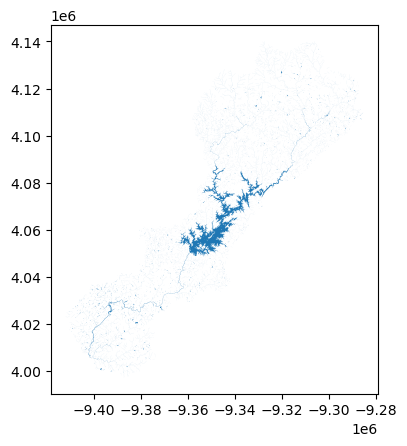

In [57]:
nwi = gpd.read_file('D:/Research/data/NWI/HU8_03130001_Watershed/NWI_LRP.shp')
nwi.plot()

In [ ]:
spring_17 = pd.read_csv(f'{BASEPATH}/data/nwi_stats_p3/PlanetBasemaps/2017_SPRING_PlanetBasemaps.csv')
spring_17

,WETLAND_TY,total_water,total_pixels,res_x,res_y
0,Lake,6212984.0,6894936,4.77,4.77
1,Freshwater Pond,268469.0,612486,4.77,4.77
2,Riverine,218386.0,1544594,4.77,4.77


In [ ]:
spring_17 = pd.read_csv(f'{BASEPATH}/data/nwi_stats_p3/DSWE/2017_SPRING_DSWE_conf3.csv')
spring_17

,WETLAND_TY,total_water,total_pixels,res_x,res_y
0,Lake,5625201.0,6894936,4.77,4.77
1,Freshwater Pond,262580.0,612486,4.77,4.77
2,Riverine,188924.0,1544574,4.77,4.77


In [ ]:
spring_17 = pd.read_csv(f'{BASEPATH}/data/nwi_stats_p3/DSWE50/2017_SPRING_DSWE50_conf3.csv')
spring_17

,WETLAND_TY,total_water,total_pixels,res_x,res_y
0,Lake,5528434.0,6894936,4.77,4.77
1,Freshwater Pond,226010.0,612486,4.77,4.77
2,Riverine,166133.0,1544574,4.77,4.77


In [65]:
spring_17['SWA_sqkm'] = spring_17['total_water'] * spring_17['res_x'] * spring_17['res_y'] / 1E6


In [66]:
spring_17

,WETLAND_TY,total_water,total_pixels,res_x,res_y,SWA_sqkm
0,Lake,5528434.0,6894936,4.77,4.77,125.787906
1,Freshwater Pond,226010.0,612486,4.77,4.77,5.142383
2,Riverine,166133.0,1544574,4.77,4.77,3.780008


In [67]:
print(np.round(spring_17['SWA_sqkm'].sum(),2))

134.71


In [ ]:
DATA_LST = ['PlanetBasemaps', 'DSWE50', 'GSW']
YEAR_LST = [2017, 2019]
SZN_LST = ['SPRING', 'SUMMER', 'FALL', 'WINTER']
CONF_LST = ['conf1', 'conf2', 'conf3']

for DATA in DATA_LST:
    print(f'\n{DATA}')
    for YEAR in YEAR_LST:
        print(f'\n{YEAR}')
        for SZN in SZN_LST:
            if DATA == 'DSWE50':
                for CONF in CONF_LST:
                    df = pd.read_csv(f'{BASEPATH}/data/nwi_stats_p3/{DATA}/{YEAR}_{SZN}_{DATA}_{CONF}.csv')
                    df['SWA_sqkm'] = df['total_water'] * df['res_x'] * df['res_y'] / 1E6
                    print(f'{CONF}\t{np.round(df['SWA_sqkm'].sum(),2)}')
            else:
                df = pd.read_csv(f'{BASEPATH}/data/nwi_stats_p3/{DATA}/{YEAR}_{SZN}_{DATA}.csv')
                df['SWA_sqkm'] = df['total_water'] * df['res_x'] * df['res_y'] / 1E6
                print(f'{SZN}\t{np.round(df['SWA_sqkm'].sum(),2)}')




PlanetBasemaps

2017
SPRING	152.44
SUMMER	152.72
FALL	156.26
WINTER	165.34

2019
SPRING	164.16
SUMMER	156.71
FALL	158.46
WINTER	167.44

DSWE50

2017
conf1	122.49
conf2	124.88
conf3	134.71
conf1	127.58
conf2	131.13
conf3	141.24
conf1	130.75
conf2	133.01
conf3	148.19
conf1	132.55
conf2	134.41
conf3	146.06

2019
conf1	135.51
conf2	138.2
conf3	150.94
conf1	136.86
conf2	140.07
conf3	152.3
conf1	136.49
conf2	138.6
conf3	152.46
conf1	131.45
conf2	133.09
conf3	145.13

GSW

2017
SPRING	137.48
SUMMER	139.62
FALL	139.7
WINTER	129.81

2019
SPRING	145.89
SUMMER	142.4
FALL	145.18
WINTER	71.43
